In [1]:
# divide by total counts for that condition OR divide by signal for histone 
# Impute the missing values using sklearn KNN imputer or IterativeImputer or MissForest
# +/- SERFF
# +/- Batch correction 
# assess pipeline using changes between control/DFO volcano and by clustering appearance 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
import math
import statsmodels
import statistics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import mannwhitneyu
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import os
import seaborn as sns
import umap 
from sklearn.preprocessing import StandardScaler
import gseapy as gp

In [4]:
# functions 
# filter protein features and keep proteins less than 600 missing values,protein features as index 

def filter_row_missings(df,number):
    '''filter protein features and keep proteins less than "number" missing values,protein features as index '''
    
    df_filtered = df[df.isna().sum(axis=1) < number]
    #df_filter = df[df.apply(lambda row: (row == 0).sum(), axis=1) <= 600]
    return(df_filtered)

def filter_column_missings(df,value):
    '''filter samples and keep samples more than "value" protein identifications,samples as columns'''
    df_filtered  = df[df.isna().sum(axis=0) < number]
    return(df_filtered )

# plot histgram of the quantified proteins in all files 
def histgram_nonzero(df): 
    '''should consider Nan values in the dataframe'''
    count_per_column = df.apply(lambda row: (row != 0).sum(), axis=0)
    plt.figure(figsize=(7.5, 5.5))
    plt.rcParams['font.family'] = 'Arial'
    plt.hist(count_per_column, bins=12, edgecolor='#112A46', color='#366AA2',alpha=0.9)
    # Set the font size for individual elements
#     plt.title('Metabolome depth', fontsize=16)
    plt.xlabel('Quantified metabolites ', fontsize=26)
    plt.ylabel('number of samples', fontsize=26)
    plt.xticks([400, 600, 800],fontsize=30)
    plt.yticks([40, 80, 120],fontsize=30)
    plt.savefig(f'{figure_save_path}/histgram_quantified_metabolites.svg',dpi=1000,bbox_inches='tight')
    plt.show()


# raw quantification file imported and well names replaced 

In [7]:
# row quantification file imported
df_meta = pd.read_csv(r'F:/SMAD PROJECT/new_druganalysis/metabolome/dima_meta5/metabolome_raw5.csv',index_col=0)
# replace well names with drug names
df_drugname = pd.read_excel(r'F:\SMAD PROJECT\new_druganalysis\drugs0506.xlsx', sheet_name = 'Sheet2')
# df_rename = df_meta.T 
# df_pro = pd.read_csv(r'C:/Users/jiangy5/Box/SMAD PROJECT/druganalysis/commonProteins_0518.csv',index_col=0)

figure_save_path = r'F:\SMAD PROJECT\new_druganalysis\metabolome\test\figures'
file_save_path = r'F:\SMAD PROJECT\new_druganalysis\metabolome\test\files'

In [ ]:
# sorted_columns = sorted(df_meta.columns)

# # Reindex DataFrame with sorted columns
# df_sorted = df_meta[sorted_columns]
# df_sorted

In [8]:
df_meta

,1_A1,1_A10,1_A11,1_A12,1_A2,1_A3,1_A4,1_A5,1_A6,1_A7,...,6_H11,6_H12,6_H2,6_H3,6_H4,6_H5,6_H6,6_H7,6_H8,6_H9
Compound,,,,,,,,,,,,,,,,,,,,,
1-aminocyclopropane-1-carboxylic acid,50490.099,76642.759,123323.467,282640.000,42972.397,47362.922,131162.074,323184.914,100322.982,120787.821,...,1285692.641,1.243303e+06,8.668364e+04,335867.809,1.574513e+05,336387.895,615432.430,179438.982,4.558779e+05,315683.371
1-aminocyclopropanecarboxylate,384192.943,1068002.509,1656140.967,3896889.250,488173.866,748300.609,1759039.824,4548471.414,1360762.607,1654496.946,...,9864156.641,2.411498e+07,4.238654e+07,5910663.309,1.050416e+08,5108664.895,7690839.930,NaN,6.240346e+07,1001053.371
massbank:ce000622 proline,15963.472,20591.019,39793.451,41569.887,6872.385,7580.656,16660.828,18202.885,20101.096,17668.096,...,66383.133,1.115604e+05,1.454283e+05,75611.766,1.188871e+05,123268.586,61140.607,169787.578,9.982420e+04,23664.068
"massbankeu:sm836003 indoline|indoline|2,3-dihydro-1h-indole",1674061.872,2117827.336,2697518.076,3565104.356,3752073.386,3181456.680,5111371.761,4461791.143,3395381.014,2536698.641,...,6642188.526,3.677703e+06,5.444792e+06,4415508.253,3.655811e+06,3089837.428,2967007.750,3518319.828,2.864707e+06,3492819.839
indoline,1674061.872,2117827.336,2697518.076,3565104.356,3752073.386,3181456.680,5111371.761,4461791.143,3395381.014,2536698.641,...,6642188.526,3.677703e+06,5.444792e+06,4415508.253,3.655811e+06,3089837.428,2967007.750,3518319.828,2.864707e+06,3492819.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"massbank:ko002677 2,6-diethylaniline|dea",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.432696e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diethanolamine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14055.445,NaN,NaN
"massbank:pt102100 2-(2-hydroxyethylamino)ethanol|diolamine|2,2'-iminodiethanol|2,2'-dihydroxydiethylamine|diethanolamine|bis(2-hydroxyethyl)amine|diethylolamine|2-(2-hydroxyethylamino)ethanol",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14055.445,NaN,NaN


# plot_histgram 

In [8]:
count_per_column = df_meta.replace(np.nan,0).apply(lambda row: (row != 0).sum(), axis=0)

# Maximum value
max_value = max(count_per_column)
# Minimum value
min_value = min(count_per_column)
# Median value
median_value = statistics.median(count_per_column)
# Mean value
mean_value = statistics.mean(count_per_column)
print(f"Max: {max_value}")
print(f"Min: {min_value}")
print(f"Median: {median_value}")
print(f"Mean: {mean_value}")

Max: 947
Min: 322
Median: 701.0
Mean: 681.0798611111111


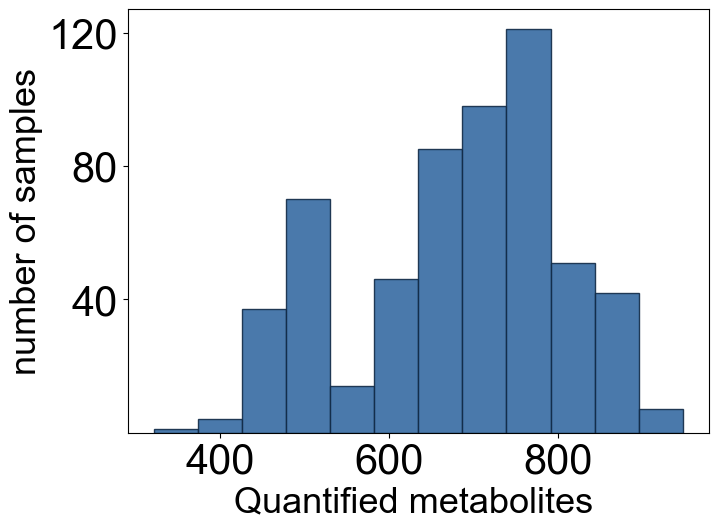

In [9]:
histgram_nonzero(df_meta.replace(np.nan,0))

In [9]:
# rename column names from fullpath to well names

# new_columns = []
# for item in df_rename.columns:   
#     hei = item.split('file_')[1].split('_correct')[0].split('_')
#     new_columns.append(hei[-1]+'_'+ hei[0])
    
# df_rename.columns = new_columns

In [10]:
# filter the QCs out
df1 = df_meta.loc[:, ~df_meta.columns.str.contains('QC')]
df1

,1_A1,1_A10,1_A11,1_A12,1_A2,1_A3,1_A4,1_A5,1_A6,1_A7,...,6_H11,6_H12,6_H2,6_H3,6_H4,6_H5,6_H6,6_H7,6_H8,6_H9
Compound,,,,,,,,,,,,,,,,,,,,,
1-aminocyclopropane-1-carboxylic acid,50490.099,76642.759,123323.467,282640.000,42972.397,47362.922,131162.074,323184.914,100322.982,120787.821,...,1285692.641,1.243303e+06,8.668364e+04,335867.809,1.574513e+05,336387.895,615432.430,179438.982,4.558779e+05,315683.371
1-aminocyclopropanecarboxylate,384192.943,1068002.509,1656140.967,3896889.250,488173.866,748300.609,1759039.824,4548471.414,1360762.607,1654496.946,...,9864156.641,2.411498e+07,4.238654e+07,5910663.309,1.050416e+08,5108664.895,7690839.930,NaN,6.240346e+07,1001053.371
massbank:ce000622 proline,15963.472,20591.019,39793.451,41569.887,6872.385,7580.656,16660.828,18202.885,20101.096,17668.096,...,66383.133,1.115604e+05,1.454283e+05,75611.766,1.188871e+05,123268.586,61140.607,169787.578,9.982420e+04,23664.068
"massbankeu:sm836003 indoline|indoline|2,3-dihydro-1h-indole",1674061.872,2117827.336,2697518.076,3565104.356,3752073.386,3181456.680,5111371.761,4461791.143,3395381.014,2536698.641,...,6642188.526,3.677703e+06,5.444792e+06,4415508.253,3.655811e+06,3089837.428,2967007.750,3518319.828,2.864707e+06,3492819.839
indoline,1674061.872,2117827.336,2697518.076,3565104.356,3752073.386,3181456.680,5111371.761,4461791.143,3395381.014,2536698.641,...,6642188.526,3.677703e+06,5.444792e+06,4415508.253,3.655811e+06,3089837.428,2967007.750,3518319.828,2.864707e+06,3492819.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"massbank:ko002677 2,6-diethylaniline|dea",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.432696e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diethanolamine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14055.445,NaN,NaN
"massbank:pt102100 2-(2-hydroxyethylamino)ethanol|diolamine|2,2'-iminodiethanol|2,2'-dihydroxydiethylamine|diethanolamine|bis(2-hydroxyethyl)amine|diethylolamine|2-(2-hydroxyethylamino)ethanol",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14055.445,NaN,NaN


In [11]:
new_columns = []
for item in df1.columns:   
    parts = item.split('_')
    new_columns.append(f"{parts[1]}_{parts[0]}")
df1.columns = new_columns 
df1

,A1_1,A10_1,A11_1,A12_1,A2_1,A3_1,A4_1,A5_1,A6_1,A7_1,...,H11_6,H12_6,H2_6,H3_6,H4_6,H5_6,H6_6,H7_6,H8_6,H9_6
Compound,,,,,,,,,,,,,,,,,,,,,
1-aminocyclopropane-1-carboxylic acid,50490.099,76642.759,123323.467,282640.000,42972.397,47362.922,131162.074,323184.914,100322.982,120787.821,...,1285692.641,1.243303e+06,8.668364e+04,335867.809,1.574513e+05,336387.895,615432.430,179438.982,4.558779e+05,315683.371
1-aminocyclopropanecarboxylate,384192.943,1068002.509,1656140.967,3896889.250,488173.866,748300.609,1759039.824,4548471.414,1360762.607,1654496.946,...,9864156.641,2.411498e+07,4.238654e+07,5910663.309,1.050416e+08,5108664.895,7690839.930,NaN,6.240346e+07,1001053.371
massbank:ce000622 proline,15963.472,20591.019,39793.451,41569.887,6872.385,7580.656,16660.828,18202.885,20101.096,17668.096,...,66383.133,1.115604e+05,1.454283e+05,75611.766,1.188871e+05,123268.586,61140.607,169787.578,9.982420e+04,23664.068
"massbankeu:sm836003 indoline|indoline|2,3-dihydro-1h-indole",1674061.872,2117827.336,2697518.076,3565104.356,3752073.386,3181456.680,5111371.761,4461791.143,3395381.014,2536698.641,...,6642188.526,3.677703e+06,5.444792e+06,4415508.253,3.655811e+06,3089837.428,2967007.750,3518319.828,2.864707e+06,3492819.839
indoline,1674061.872,2117827.336,2697518.076,3565104.356,3752073.386,3181456.680,5111371.761,4461791.143,3395381.014,2536698.641,...,6642188.526,3.677703e+06,5.444792e+06,4415508.253,3.655811e+06,3089837.428,2967007.750,3518319.828,2.864707e+06,3492819.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"massbank:ko002677 2,6-diethylaniline|dea",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.432696e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diethanolamine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14055.445,NaN,NaN
"massbank:pt102100 2-(2-hydroxyethylamino)ethanol|diolamine|2,2'-iminodiethanol|2,2'-dihydroxydiethylamine|diethanolamine|bis(2-hydroxyethyl)amine|diethylolamine|2-(2-hydroxyethylamino)ethanol",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14055.445,NaN,NaN


In [12]:
# rename well names to drug names

dictionary1 = pd.Series(df_drugname['drugnames'].values, index=df_drugname['wells']).to_dict()

dictname = dictionary1
for old, new in dictname.items():
    df1.columns = [colname.replace(old, new) for colname in df1.columns]

In [13]:
print(df1.shape)
# df1.to_csv(f'{file_save_path}/proteome_raw_drugnames_replaced.csv')

(2628, 576)


# dataset cleaning 

In [14]:
# df = df_pro.filter(regex='g', axis=1)

In [15]:
# To have protein features exist in at least half samples 

df2 = filter_row_missings(df1,df1.shape[1]/2) 
print(df2.shape)
# after cleaning 887 protein features left

(592, 576)


In [16]:
def clean_mixed_items(items):
    cleaned_items = []
    for item in items:
        if 'massbank' in item:
            # Remove 'massbank:xxxx' part
            cleaned_item = item.split(' ', 1)[1]
        elif 'collisionenergy:' in item:
            # Remove 'collisionenergy:xxxx' part
            cleaned_item = item.split(' collisionenergy')[0]
        else:
            # If the item doesn't match any known pattern, keep it as is
            cleaned_item = item
        cleaned_items.append(cleaned_item)
    return cleaned_items

In [17]:
df2.index = clean_mixed_items(df2.index)
df3 = df2.reset_index().drop_duplicates(subset='index',keep='first').set_index('index')
df3

,DMSO_a1,DMSO_j1,DMSO_k1,DMSO_l1,DMSO_b1,DMSO_c1,DMSO_d1,DMSO_e1,DMSO_f1,DMSO_g1,...,DFO_k6,DFO_l6,DFO_b6,DFO_c6,DFO_d6,DFO_e6,DFO_f6,DFO_g6,DFO_h6,DFO_i6
index,,,,,,,,,,,,,,,,,,,,,
1-aminocyclopropane-1-carboxylic acid,50490.099,76642.759,123323.467,282640.000,42972.397,47362.922,131162.074,323184.914,100322.982,120787.821,...,1285692.641,1.243303e+06,8.668364e+04,335867.809,1.574513e+05,336387.895,615432.430,179438.982,4.558779e+05,315683.371
1-aminocyclopropanecarboxylate,384192.943,1068002.509,1656140.967,3896889.250,488173.866,748300.609,1759039.824,4548471.414,1360762.607,1654496.946,...,9864156.641,2.411498e+07,4.238654e+07,5910663.309,1.050416e+08,5108664.895,7690839.930,NaN,6.240346e+07,1001053.371
proline,15963.472,20591.019,39793.451,41569.887,6872.385,7580.656,16660.828,18202.885,20101.096,17668.096,...,66383.133,1.115604e+05,1.454283e+05,75611.766,1.188871e+05,123268.586,61140.607,169787.578,9.982420e+04,23664.068
"indoline|indoline|2,3-dihydro-1h-indole",1674061.872,2117827.336,2697518.076,3565104.356,3752073.386,3181456.680,5111371.761,4461791.143,3395381.014,2536698.641,...,6642188.526,3.677703e+06,5.444792e+06,4415508.253,3.655811e+06,3089837.428,2967007.750,3518319.828,2.864707e+06,3492819.839
indoline,1674061.872,2117827.336,2697518.076,3565104.356,3752073.386,3181456.680,5111371.761,4461791.143,3395381.014,2536698.641,...,6642188.526,3.677703e+06,5.444792e+06,4415508.253,3.655811e+06,3089837.428,2967007.750,3518319.828,2.864707e+06,3492819.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""4-hydroxy-5,7-dimethyl-3-benzylhydroquinolin-2-one",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29759.667,8.844482e+03,2.153954e+04,22139.575,1.890644e+04,21395.708,13562.798,6385.385,1.916896e+04,21303.190
2-amino-2-methylpropanoic acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120111.998,9.097759e+04,NaN,91931.396,4.621272e+04,NaN,109421.361,159905.143,1.065308e+05,43496.309
3-aminoisobutanoic acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120111.998,9.097759e+04,NaN,91931.396,4.621272e+04,NaN,109421.361,159905.143,1.065308e+05,43496.309


# Data preprocessing and normalization

In [18]:
# df2.filter(regex='quality_con', axis=1)

# df_drug = df2.loc[:, ~df2.columns.str.contains('quality_con')]


In [19]:
def get_highest_value_with_index(df):
    result = {}
    for col in df.columns:
        max_value = df[col].max()
        max_index = df[col].idxmax()
        result[col] = (max_index, max_value)
    return result

In [20]:
def knn_imputer(df, neighbors = 6):
    '''apply KNN imputation to a dataset'''
    from sklearn.impute import KNNImputer

    # Initialize the KNNImputer
    imputer = KNNImputer(n_neighbors = neighbors)
    
    imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)
    return imputed_df

def iterative_imputer(df, maxiteration = 10 , randomstates = 0):
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer

    # Initialize the IterativeImputer
    imputer = IterativeImputer(max_iter= maxiteration, random_state= randomstates)

    # Create a new DataFrame with the imputed values
    imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)
    return imputed_df

def meanvalue_imputer(df, replicates = 6):
    # impute missing values with Mean, imput dataframe should be sorted by index ot group replicates together
    
    chunks = []
    total_rows = df.shape[0]
    num_chunks = total_rows // replicates  # Calculates how many full chunks of size nu there are

    # Loop through the DataFrame in chunks
    for i in range(0, total_rows, replicates):
        # Create a chunk by slicing the DataFrame
        chunk = tar_df.iloc[i:i + replicates, :]

        # Apply the fillna operation using the mean of each column
        filled_chunk = chunk.apply(lambda x: x.fillna(x.mean()), axis=0)

        # Append the processed chunk to the list
        chunks.append(filled_chunk)

    # Concatenate all chunks back into a single DataFrame
    imputed_df = pd.concat(chunks)
    return imputed_df

class DatasetNormalizeDf:
    
    @staticmethod 
    def divided_by_a_protein(df, row_index = '2/sp|Q16777|H2A2C_HUMAN/sp|Q6FI13|H2A2A_HUMAN'):
        '''Divides the DataFrame by a specific protein row index,
        columns as treatments and rows as proteins'''
        
        # Dividing the entire DataFrame by the chosen row
        normalized_df = df.div(df.loc[row_index], axis=1)
                               
        return normalized_df  
    
    @staticmethod      
    def divided_by_total_counts(df):
        '''Divides each column in the DataFrame by the total sum of that column,
        columns as treatments and rows as proteins'''
               
        column_sums = df.sum()
        normalized_df = df.div(column_sums, axis=1)
        
        return normalized_df
    
    def standardscaler(df):     
        '''apply standard normalization to a dataframe, 
        columns as treatments and rows as proteins'''
        # # Initialize the StandardScaler
        scaler = StandardScaler()
        # Fit and transform the data according to rows
        scaled_data = scaler.fit_transform(df)
        normalized_df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)
        return normalized_df

def get_dmso_dfo(df):
    dmso = df.filter(regex='DMSO', axis=1)
    dfo = df.filter(regex='DFO', axis=1)
    return (dmso,dfo)        

In [21]:
# Function to determine label
def get_label(index):
    for name in namestrings:
        if name in index:
            return name
    return 'Others'

# function to plot UMAP according to 

def plot_umap(df, namestring = ['1'], figuretitle = 'UMAP'):
    plt.rcParams['font.family'] = 'Arial'
    reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
    scaler = StandardScaler()
    # Fit and transform the data according to rows
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
    embedding = reducer.fit_transform(df_scaled)   
    # Step 3: Create a new DataFrame for UMAP results
    umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'], index=df.index)
    
    # Step 4: Add non-numeric labels to the new DataFrame
#     umap_df['Label'] = df.index.map(lambda x: namestring1 if namestring1 in x else
#                                               namestring2 if namestring2 in x else
#                                               namestring3 if namestring3 in x else 'others')
    umap_df['Label'] = df.index.map(get_label)

    # Step 5: Plot using the new DataFrame
    #palette = {namestring: 'red', 'others': 'grey'}
    #palette = color_dict
    plt.figure(figsize=(5.5, 4.5))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='Label', data=umap_df, s=60, alpha=0.8, legend=True)
    plt.title(figuretitle,fontsize=18)
    plt.xlabel('UMAP 1',fontsize=20)
    plt.ylabel('UMAP 2',fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=16)
    plt.savefig(f'{figure_save_path}/{figuretitle}.svg',dpi=800,bbox_inches='tight')
    plt.show()

In [22]:
df4 = knn_imputer(df3, neighbors = 6)
df4

,DMSO_a1,DMSO_j1,DMSO_k1,DMSO_l1,DMSO_b1,DMSO_c1,DMSO_d1,DMSO_e1,DMSO_f1,DMSO_g1,...,DFO_k6,DFO_l6,DFO_b6,DFO_c6,DFO_d6,DFO_e6,DFO_f6,DFO_g6,DFO_h6,DFO_i6
index,,,,,,,,,,,,,,,,,,,,,
1-aminocyclopropane-1-carboxylic acid,5.049010e+04,7.664276e+04,1.233235e+05,2.826400e+05,4.297240e+04,4.736292e+04,1.311621e+05,323184.914,1.003230e+05,1.207878e+05,...,1285692.641,1.243303e+06,8.668364e+04,335867.809,1.574513e+05,3.363879e+05,615432.430,179438.982,4.558779e+05,315683.371
1-aminocyclopropanecarboxylate,3.841929e+05,1.068003e+06,1.656141e+06,3.896889e+06,4.881739e+05,7.483006e+05,1.759040e+06,4548471.414,1.360763e+06,1.654497e+06,...,9864156.641,2.411498e+07,4.238654e+07,5910663.309,1.050416e+08,5.108665e+06,7690839.930,804434.279,6.240346e+07,1001053.371
proline,1.596347e+04,2.059102e+04,3.979345e+04,4.156989e+04,6.872385e+03,7.580656e+03,1.666083e+04,18202.885,2.010110e+04,1.766810e+04,...,66383.133,1.115604e+05,1.454283e+05,75611.766,1.188871e+05,1.232686e+05,61140.607,169787.578,9.982420e+04,23664.068
"indoline|indoline|2,3-dihydro-1h-indole",1.674062e+06,2.117827e+06,2.697518e+06,3.565104e+06,3.752073e+06,3.181457e+06,5.111372e+06,4461791.143,3.395381e+06,2.536699e+06,...,6642188.526,3.677703e+06,5.444792e+06,4415508.253,3.655811e+06,3.089837e+06,2967007.750,3518319.828,2.864707e+06,3492819.839
indoline,1.674062e+06,2.117827e+06,2.697518e+06,3.565104e+06,3.752073e+06,3.181457e+06,5.111372e+06,4461791.143,3.395381e+06,2.536699e+06,...,6642188.526,3.677703e+06,5.444792e+06,4415508.253,3.655811e+06,3.089837e+06,2967007.750,3518319.828,2.864707e+06,3492819.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""4-hydroxy-5,7-dimethyl-3-benzylhydroquinolin-2-one",1.645273e+04,1.518703e+04,1.727644e+04,1.836818e+04,2.466655e+04,2.132322e+04,1.883942e+04,16519.613,2.028632e+04,1.596705e+04,...,29759.667,8.844482e+03,2.153954e+04,22139.575,1.890644e+04,2.139571e+04,13562.798,6385.385,1.916896e+04,21303.190
2-amino-2-methylpropanoic acid,1.031609e+05,1.395315e+05,2.626300e+05,2.258365e+05,1.086784e+05,1.625711e+05,1.997645e+05,219799.423,2.599639e+05,2.257454e+05,...,120111.998,9.097759e+04,1.533166e+05,91931.396,4.621272e+04,1.498286e+05,109421.361,159905.143,1.065308e+05,43496.309
3-aminoisobutanoic acid,1.031609e+05,1.395315e+05,2.626300e+05,3.860578e+05,1.086784e+05,1.625711e+05,1.997645e+05,219799.423,2.599639e+05,2.257454e+05,...,120111.998,9.097759e+04,1.533166e+05,91931.396,4.621272e+04,1.498286e+05,109421.361,159905.143,1.065308e+05,43496.309


In [23]:
df4.index = [item.split('|')[0] for item in df4.index]

In [24]:
df5 = df4.loc[~df4.index.duplicated(keep='first')]

In [25]:
df5

,DMSO_a1,DMSO_j1,DMSO_k1,DMSO_l1,DMSO_b1,DMSO_c1,DMSO_d1,DMSO_e1,DMSO_f1,DMSO_g1,...,DFO_k6,DFO_l6,DFO_b6,DFO_c6,DFO_d6,DFO_e6,DFO_f6,DFO_g6,DFO_h6,DFO_i6
1-aminocyclopropane-1-carboxylic acid,5.049010e+04,7.664276e+04,1.233235e+05,2.826400e+05,4.297240e+04,4.736292e+04,1.311621e+05,323184.914,1.003230e+05,1.207878e+05,...,1285692.641,1.243303e+06,8.668364e+04,335867.809,1.574513e+05,3.363879e+05,615432.430,179438.982,4.558779e+05,315683.371
1-aminocyclopropanecarboxylate,3.841929e+05,1.068003e+06,1.656141e+06,3.896889e+06,4.881739e+05,7.483006e+05,1.759040e+06,4548471.414,1.360763e+06,1.654497e+06,...,9864156.641,2.411498e+07,4.238654e+07,5910663.309,1.050416e+08,5.108665e+06,7690839.930,804434.279,6.240346e+07,1001053.371
proline,1.596347e+04,2.059102e+04,3.979345e+04,4.156989e+04,6.872385e+03,7.580656e+03,1.666083e+04,18202.885,2.010110e+04,1.766810e+04,...,66383.133,1.115604e+05,1.454283e+05,75611.766,1.188871e+05,1.232686e+05,61140.607,169787.578,9.982420e+04,23664.068
indoline,1.674062e+06,2.117827e+06,2.697518e+06,3.565104e+06,3.752073e+06,3.181457e+06,5.111372e+06,4461791.143,3.395381e+06,2.536699e+06,...,6642188.526,3.677703e+06,5.444792e+06,4415508.253,3.655811e+06,3.089837e+06,2967007.750,3518319.828,2.864707e+06,3492819.839
2-amino-1-phenylethanol,1.679922e+06,2.124975e+06,2.700916e+06,3.552407e+06,3.754214e+06,3.183287e+06,5.104474e+06,4451838.055,3.395168e+06,2.542128e+06,...,6593000.352,3.652009e+06,5.409501e+06,4376239.148,3.643401e+06,3.065027e+06,2946922.891,3496041.227,2.842159e+06,3460362.709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""4-hydroxy-5,7-dimethyl-3-benzylhydroquinolin-2-one",1.645273e+04,1.518703e+04,1.727644e+04,1.836818e+04,2.466655e+04,2.132322e+04,1.883942e+04,16519.613,2.028632e+04,1.596705e+04,...,29759.667,8.844482e+03,2.153954e+04,22139.575,1.890644e+04,2.139571e+04,13562.798,6385.385,1.916896e+04,21303.190
2-amino-2-methylpropanoic acid,1.031609e+05,1.395315e+05,2.626300e+05,2.258365e+05,1.086784e+05,1.625711e+05,1.997645e+05,219799.423,2.599639e+05,2.257454e+05,...,120111.998,9.097759e+04,1.533166e+05,91931.396,4.621272e+04,1.498286e+05,109421.361,159905.143,1.065308e+05,43496.309
3-aminoisobutanoic acid,1.031609e+05,1.395315e+05,2.626300e+05,3.860578e+05,1.086784e+05,1.625711e+05,1.997645e+05,219799.423,2.599639e+05,2.257454e+05,...,120111.998,9.097759e+04,1.533166e+05,91931.396,4.621272e+04,1.498286e+05,109421.361,159905.143,1.065308e+05,43496.309
2-(1h-indol-3-yl)acetonitrile,4.309453e+04,1.349959e+05,1.296799e+05,1.410507e+05,7.034385e+04,8.482274e+04,1.126046e+05,129463.429,1.379894e+05,1.036008e+05,...,196552.598,1.391932e+05,1.478925e+05,149562.797,1.138067e+05,9.643269e+04,111952.856,108328.224,1.010901e+05,134720.668


In [26]:
df6= df5[~df5.index.str.contains("mmv")]
df6.index = [item.replace('dl-', '') for item in df6.index]
df7 = df6.loc[~df6.index.duplicated(keep='first')]

In [27]:
df7

,DMSO_a1,DMSO_j1,DMSO_k1,DMSO_l1,DMSO_b1,DMSO_c1,DMSO_d1,DMSO_e1,DMSO_f1,DMSO_g1,...,DFO_k6,DFO_l6,DFO_b6,DFO_c6,DFO_d6,DFO_e6,DFO_f6,DFO_g6,DFO_h6,DFO_i6
1-aminocyclopropane-1-carboxylic acid,5.049010e+04,7.664276e+04,1.233235e+05,2.826400e+05,4.297240e+04,4.736292e+04,1.311621e+05,323184.914,1.003230e+05,1.207878e+05,...,1285692.641,1.243303e+06,8.668364e+04,335867.809,1.574513e+05,3.363879e+05,615432.430,179438.982,4.558779e+05,315683.371
1-aminocyclopropanecarboxylate,3.841929e+05,1.068003e+06,1.656141e+06,3.896889e+06,4.881739e+05,7.483006e+05,1.759040e+06,4548471.414,1.360763e+06,1.654497e+06,...,9864156.641,2.411498e+07,4.238654e+07,5910663.309,1.050416e+08,5.108665e+06,7690839.930,804434.279,6.240346e+07,1001053.371
proline,1.596347e+04,2.059102e+04,3.979345e+04,4.156989e+04,6.872385e+03,7.580656e+03,1.666083e+04,18202.885,2.010110e+04,1.766810e+04,...,66383.133,1.115604e+05,1.454283e+05,75611.766,1.188871e+05,1.232686e+05,61140.607,169787.578,9.982420e+04,23664.068
indoline,1.674062e+06,2.117827e+06,2.697518e+06,3.565104e+06,3.752073e+06,3.181457e+06,5.111372e+06,4461791.143,3.395381e+06,2.536699e+06,...,6642188.526,3.677703e+06,5.444792e+06,4415508.253,3.655811e+06,3.089837e+06,2967007.750,3518319.828,2.864707e+06,3492819.839
2-amino-1-phenylethanol,1.679922e+06,2.124975e+06,2.700916e+06,3.552407e+06,3.754214e+06,3.183287e+06,5.104474e+06,4451838.055,3.395168e+06,2.542128e+06,...,6593000.352,3.652009e+06,5.409501e+06,4376239.148,3.643401e+06,3.065027e+06,2946922.891,3496041.227,2.842159e+06,3460362.709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""4-hydroxy-5,7-dimethyl-3-benzylhydroquinolin-2-one",1.645273e+04,1.518703e+04,1.727644e+04,1.836818e+04,2.466655e+04,2.132322e+04,1.883942e+04,16519.613,2.028632e+04,1.596705e+04,...,29759.667,8.844482e+03,2.153954e+04,22139.575,1.890644e+04,2.139571e+04,13562.798,6385.385,1.916896e+04,21303.190
2-amino-2-methylpropanoic acid,1.031609e+05,1.395315e+05,2.626300e+05,2.258365e+05,1.086784e+05,1.625711e+05,1.997645e+05,219799.423,2.599639e+05,2.257454e+05,...,120111.998,9.097759e+04,1.533166e+05,91931.396,4.621272e+04,1.498286e+05,109421.361,159905.143,1.065308e+05,43496.309
3-aminoisobutanoic acid,1.031609e+05,1.395315e+05,2.626300e+05,3.860578e+05,1.086784e+05,1.625711e+05,1.997645e+05,219799.423,2.599639e+05,2.257454e+05,...,120111.998,9.097759e+04,1.533166e+05,91931.396,4.621272e+04,1.498286e+05,109421.361,159905.143,1.065308e+05,43496.309
2-(1h-indol-3-yl)acetonitrile,4.309453e+04,1.349959e+05,1.296799e+05,1.410507e+05,7.034385e+04,8.482274e+04,1.126046e+05,129463.429,1.379894e+05,1.036008e+05,...,196552.598,1.391932e+05,1.478925e+05,149562.797,1.138067e+05,9.643269e+04,111952.856,108328.224,1.010901e+05,134720.668


In [28]:
df7.to_csv(f'{file_save_path}/final_metabolome_drugs_raw_pre.csv')

In [29]:
final_df = pd.read_csv(f'{file_save_path}/final_metabolome_drugs_raw_pre.csv',index_col = 0)
df_previous = pd.read_excel(f'{file_save_path}/final_metabolome_drugs.xlsx',index_col = 0)

In [30]:
final_df

,DMSO_a1,DMSO_j1,DMSO_k1,DMSO_l1,DMSO_b1,DMSO_c1,DMSO_d1,DMSO_e1,DMSO_f1,DMSO_g1,...,DFO_k6,DFO_l6,DFO_b6,DFO_c6,DFO_d6,DFO_e6,DFO_f6,DFO_g6,DFO_h6,DFO_i6
1-aminocyclopropane-1-carboxylic acid,5.049010e+04,7.664276e+04,1.233235e+05,2.826400e+05,4.297240e+04,4.736292e+04,1.311621e+05,323184.914,1.003230e+05,1.207878e+05,...,1285692.641,1.243303e+06,8.668364e+04,335867.809,1.574513e+05,3.363879e+05,615432.430,179438.982,4.558779e+05,315683.371
1-aminocyclopropanecarboxylate,3.841929e+05,1.068003e+06,1.656141e+06,3.896889e+06,4.881739e+05,7.483006e+05,1.759040e+06,4548471.414,1.360763e+06,1.654497e+06,...,9864156.641,2.411498e+07,4.238654e+07,5910663.309,1.050416e+08,5.108665e+06,7690839.930,804434.279,6.240346e+07,1001053.371
proline,1.596347e+04,2.059102e+04,3.979345e+04,4.156989e+04,6.872385e+03,7.580656e+03,1.666083e+04,18202.885,2.010110e+04,1.766810e+04,...,66383.133,1.115604e+05,1.454283e+05,75611.766,1.188871e+05,1.232686e+05,61140.607,169787.578,9.982420e+04,23664.068
indoline,1.674062e+06,2.117827e+06,2.697518e+06,3.565104e+06,3.752073e+06,3.181457e+06,5.111372e+06,4461791.143,3.395381e+06,2.536699e+06,...,6642188.526,3.677703e+06,5.444792e+06,4415508.253,3.655811e+06,3.089837e+06,2967007.750,3518319.828,2.864707e+06,3492819.839
2-amino-1-phenylethanol,1.679922e+06,2.124975e+06,2.700916e+06,3.552407e+06,3.754214e+06,3.183287e+06,5.104474e+06,4451838.055,3.395168e+06,2.542128e+06,...,6593000.352,3.652009e+06,5.409501e+06,4376239.148,3.643401e+06,3.065027e+06,2946922.891,3496041.227,2.842159e+06,3460362.709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""4-hydroxy-5,7-dimethyl-3-benzylhydroquinolin-2-one",1.645273e+04,1.518703e+04,1.727644e+04,1.836818e+04,2.466655e+04,2.132322e+04,1.883942e+04,16519.613,2.028632e+04,1.596705e+04,...,29759.667,8.844482e+03,2.153954e+04,22139.575,1.890644e+04,2.139571e+04,13562.798,6385.385,1.916896e+04,21303.190
2-amino-2-methylpropanoic acid,1.031609e+05,1.395315e+05,2.626300e+05,2.258365e+05,1.086784e+05,1.625711e+05,1.997645e+05,219799.423,2.599639e+05,2.257454e+05,...,120111.998,9.097759e+04,1.533166e+05,91931.396,4.621272e+04,1.498286e+05,109421.361,159905.143,1.065308e+05,43496.309
3-aminoisobutanoic acid,1.031609e+05,1.395315e+05,2.626300e+05,3.860578e+05,1.086784e+05,1.625711e+05,1.997645e+05,219799.423,2.599639e+05,2.257454e+05,...,120111.998,9.097759e+04,1.533166e+05,91931.396,4.621272e+04,1.498286e+05,109421.361,159905.143,1.065308e+05,43496.309
2-(1h-indol-3-yl)acetonitrile,4.309453e+04,1.349959e+05,1.296799e+05,1.410507e+05,7.034385e+04,8.482274e+04,1.126046e+05,129463.429,1.379894e+05,1.036008e+05,...,196552.598,1.391932e+05,1.478925e+05,149562.797,1.138067e+05,9.643269e+04,111952.856,108328.224,1.010901e+05,134720.668


In [31]:
final_dfdf = final_df.loc[final_df.index.isin(df_previous.index)]

In [32]:
final_dfdf.to_csv(f'{file_save_path}/final_metabolome_drugs_raw.csv')

In [87]:
# normalized_df =DatasetNormalizeDf.standardscaler(np.log10(df4))

# normalized_df = DatasetNormalizeDf.divided_by_total_counts(np.log2(final_dfdf))*10000
normalized_df = DatasetNormalizeDf.divided_by_total_counts(df5)*10000

# normalized_df2 = DatasetNormalizeDf.standardscaler(normalized_df)
normalized_df
# df3

,DMSO_a1,DMSO_j1,DMSO_k1,DMSO_l1,DMSO_b1,DMSO_c1,DMSO_d1,DMSO_e1,DMSO_f1,DMSO_g1,...,DFO_k6,DFO_l6,DFO_b6,DFO_c6,DFO_d6,DFO_e6,DFO_f6,DFO_g6,DFO_h6,DFO_i6
1-aminocyclopropane-1-carboxylic acid,11.275083,8.010496,13.491640,20.275540,5.766512,6.526608,15.005958,29.333539,10.034467,13.060306,...,99.084550,92.557425,6.901524,37.105639,9.176491,41.858182,71.822214,26.662167,32.078760,33.619633
1-aminocyclopropanecarboxylate,85.795181,111.624764,181.182534,279.548309,65.508572,103.115776,201.247795,412.837231,136.105674,178.894168,...,760.201541,1795.234742,3374.704946,652.991835,6121.974398,635.692982,897.536632,119.527878,4391.143669,106.610135
proline,3.564847,2.152118,4.353421,2.982069,0.922213,1.044614,1.906128,1.652166,2.010544,1.910381,...,5.115953,8.305092,11.578617,8.353354,6.928913,15.338836,7.135233,25.228101,7.024329,2.520175
indoline,373.839355,221.349644,295.109638,255.747298,503.494729,438.404528,584.780562,404.969787,339.611495,274.283125,...,511.893934,273.785785,433.500023,487.811720,213.065956,384.481662,346.255828,522.773972,201.580799,371.978162
2-amino-1-phenylethanol,375.148102,222.096672,295.481407,254.836456,503.781960,438.656769,583.991411,404.066406,339.590187,274.870209,...,508.103146,271.872996,430.690271,483.473391,212.342638,381.394433,343.911884,519.463679,199.994151,368.521544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""4-hydroxy-5,7-dimethyl-3-benzylhydroquinolin-2-one",3.674105,1.587308,1.890050,1.317665,3.310030,2.938338,2.155376,1.499385,2.029071,1.726453,...,2.293490,0.658426,1.714921,2.445912,1.101894,2.662359,1.582806,0.948780,1.348862,2.268746
2-amino-2-methylpropanoic acid,23.037139,14.583457,28.731834,16.200666,14.583666,22.402289,22.854608,19.949864,26.002008,24.408950,...,9.256678,6.772807,12.206665,10.156297,2.693344,18.643818,12.769695,23.759707,7.496252,4.632268
3-aminoisobutanoic acid,23.037139,14.583457,28.731834,27.694345,14.583666,22.402289,22.854608,19.949864,26.002008,24.408950,...,9.256678,6.772807,12.206665,10.156297,2.693344,18.643818,12.769695,23.759707,7.496252,4.632268
2-(1h-indol-3-yl)acetonitrile,9.623557,14.109413,14.187032,10.118450,9.439517,11.688569,12.882841,11.750612,13.801921,11.201942,...,15.147731,10.362208,11.774814,16.523236,6.632816,11.999531,13.065126,16.096085,7.113405,14.347475


In [71]:
# df2.filter(regex='DFO', axis=1).info()

# UMAP plot to see the layout

In [72]:
# namestrings = ['1','2','3','4','5','6']
# plot_umap(df3.T, namestring = namestrings, figuretitle = '6 batches')
# namestrings = ['DMSO','DFO']
# namestrings = ['DFO']

In [73]:
# namestrings = ['DMSO','DFO']
# plot_umap(df3.T, namestring = namestrings, figuretitle = 'DMSO_DFO')

#  Batch effect correction 

In [88]:
def combat_correction(result = df3):
    '''input dataframe contains proteins (rows) for each sample (columns)'''
    from combat.pycombat import pycombat
    
#   batchs: List of batch indexes. The batch list describes the batch for each sample. 
    batchs = [int(''.join(re.findall(r'\d+', item))) for item in  result.columns] 

    corrected_df = pycombat(result, batchs)
    # result['batches'] = batchs
    return corrected_df

In [89]:
# batches 的修改有问题

In [90]:
dfx = combat_correction(result = normalized_df).abs()

Found 6 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [91]:
dfx2 = dfx.reindex(sorted(dfx.columns), axis=1)
dfx2

,Acamprosate1,Acamprosate2,Acamprosate3,Acamprosate4,Acamprosate5,Acamprosate6,Acenocoumarol1,Acenocoumarol2,Acenocoumarol3,Acenocoumarol4,...,Yohimbine3,Yohimbine4,Yohimbine5,Yohimbine6,Zaltoprofen1,Zaltoprofen2,Zaltoprofen3,Zaltoprofen4,Zaltoprofen5,Zaltoprofen6
1-aminocyclopropane-1-carboxylic acid,26.166370,63.241810,87.787620,123.524166,125.065038,181.156687,86.416349,87.254390,16.379285,157.568977,...,109.777796,6.976177,75.762927,40.789734,185.575747,124.143413,422.181797,151.674788,71.862212,146.507906
1-aminocyclopropanecarboxylate,573.436262,1177.956830,1560.699053,1484.404136,1017.903319,1570.074248,1445.090527,1167.585967,290.603226,1501.578576,...,1348.709674,2741.875624,1890.612796,289.681181,3050.827348,1798.662263,4616.257654,1310.046064,172.716587,2098.363690
proline,1.336185,3.087274,2.767689,1.582792,1.459592,0.991754,2.515810,1.664168,0.133234,1.446599,...,0.718139,1.168442,1.567511,0.904999,3.214858,1.827150,0.772629,1.779035,1.693430,0.727666
indoline,297.346943,253.570621,198.406784,281.584772,230.112970,190.736051,192.589003,258.607404,342.592621,176.764342,...,203.830204,190.458114,223.690351,156.268689,257.686570,256.424229,199.153709,245.180382,226.559472,162.421059
2-amino-1-phenylethanol,297.031461,253.617065,197.769243,281.077439,229.596049,190.308497,192.817384,257.066463,341.126540,177.169603,...,203.343900,189.667850,223.063777,155.925479,257.822293,255.919785,198.458279,244.713156,226.161637,162.131617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""4-hydroxy-5,7-dimethyl-3-benzylhydroquinolin-2-one",1.786053,1.629367,1.786028,1.464525,1.804830,0.771018,1.163296,1.300528,0.814540,1.106814,...,1.424743,0.942748,1.390341,0.967978,1.115262,1.296508,0.902262,1.148563,1.315841,0.771541
2-amino-2-methylpropanoic acid,24.345255,23.488281,52.713284,31.054713,25.150664,49.293441,37.585611,34.416350,15.479581,38.031387,...,21.993175,20.753243,37.962186,78.849924,34.029213,19.057340,147.674111,28.694949,45.720715,37.621365
3-aminoisobutanoic acid,21.163174,23.589536,52.974875,31.403960,25.483502,49.658729,33.720840,34.804515,15.997317,38.377236,...,22.466102,21.107505,38.299989,79.197634,30.347814,19.042263,147.282431,29.045344,46.061523,37.993595
2-(1h-indol-3-yl)acetonitrile,5.660457,12.467305,7.466003,11.536334,11.095228,7.128782,12.150257,14.566540,16.648064,7.718118,...,6.240281,8.041935,7.744514,5.244798,8.605806,6.615779,4.361904,8.409367,9.696871,6.560121


In [137]:
# dfx2.to_csv(f'{file_save_path}/metabolome_after_Normalization and imputation and BC2.csv')


In [81]:
# normalized_df =DatasetNormalizeDf.standardscaler(np.log2(df5))
# normalized_df = DatasetNormalizeDf.divided_by_total_counts(df5)*10000
# normalized_df = DatasetNormalizeDf.divided_by_a_protein(df3, row_index = '2/sp|Q16777|H2A2C_HUMAN/sp|Q6FI13|H2A2A_HUMAN')

In [82]:
# df5.loc[:, df5.columns.str.contains('2')]

In [83]:
# dfx.to_csv(f'{file_save_path}/metabolome_after_Normalization and imputation and BC.csv')

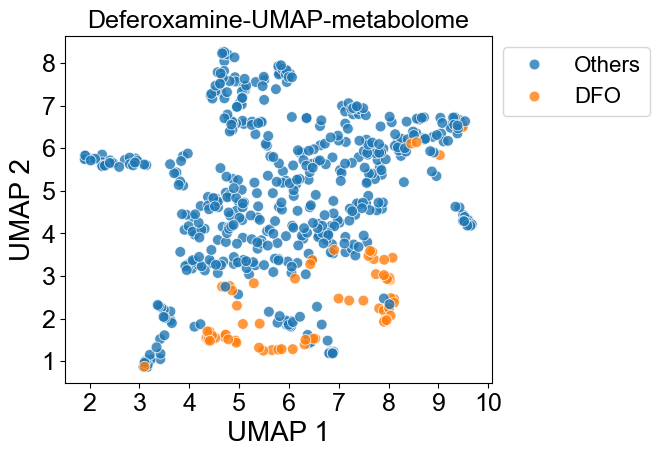

In [92]:
# namestrings = ['1','2','3','4','5','6']
namestrings = ['DFO']
plot_umap(dfx.T, namestring = namestrings, figuretitle =  'Deferoxamine-UMAP-metabolome')

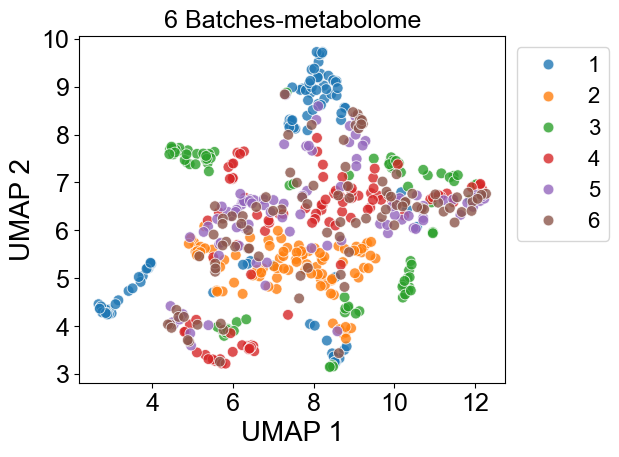

In [129]:
namestrings = ['1','2','3','4','5','6']
# namestrings = ['DMSO','DFO']
plot_umap(dfx.abs().T, namestring = namestrings, figuretitle = '6 Batches-metabolome')

In [86]:
# sns.histplot(df5.DMSO_a1, kde=True)

In [93]:
sorted_columns = sorted(dfx.columns)

# Reindex DataFrame with sorted columns
df_sorted = dfx[sorted_columns]
# df_sorted.to_csv(f'{file_save_path}/metabolome_after_Normalization imputation BC and index rename.csv')

# check DMSO and DFO

In [94]:
# check before batch correction 
# df = df4*1000
df = df_sorted 

dmso = df.filter(regex='DMSO', axis=1)
dfo = df.filter(regex='DFO', axis=1)
drugs = df.loc[:, ~df_sorted.columns.str.contains('DMSO|DFO')]
# Function to apply Benjamini-Hochberg correction to a series of p-values
def bh_correction(p_values):
    _, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')
    return pvals_corrected

In [95]:

results_dict = {'Metabolites': [], 'logFC': [], 'pValue': []}

for j in range(dmso.shape[0]):
    dmsopro = dmso.iloc[j, :].tolist()
    dfopro = dfo.iloc[j, :].tolist()
    protein_name = dmso.index[j]     
    # Calculate the p-value of the t-test between drug and DMSO profiles
    pval = stats.ttest_ind(dfopro, dmsopro, equal_var=False)[1]
    
    # Calculate the log fold change
    logFC = np.log2(np.mean(dfopro) / np.mean(dmsopro))
#   logFC = np.mean(dfopro) / np.mean(dmsopro)
    # Store the results
    results_dict['Metabolites'].append(protein_name)
    results_dict['logFC'].append(logFC)
    results_dict['pValue'].append(pval)
# change to df    
results_df = pd.DataFrame(results_dict)
results_df.set_index('Metabolites', inplace = True)

# aapply bh_correction to the p value and add a new column
results_df['bh_corrected_pVal'] = bh_correction(results_df['pValue'])
results_df['-log10(pValue)'] = -np.log10(results_df['bh_corrected_pVal'])

In [96]:
results_df

,logFC,pValue,bh_corrected_pVal,-log10(pValue)
Metabolites,,,,
1-aminocyclopropane-1-carboxylic acid,0.174564,5.069801e-01,6.031682e-01,0.219562
1-aminocyclopropanecarboxylate,-0.128347,5.664463e-01,6.492016e-01,0.187620
proline,0.795198,1.553526e-04,5.013151e-04,3.299889
indoline,0.425559,6.571559e-09,7.044155e-08,7.152171
2-amino-1-phenylethanol,0.424604,6.657114e-09,7.044155e-08,7.152171
...,...,...,...,...
"""4-hydroxy-5,7-dimethyl-3-benzylhydroquinolin-2-one",-0.015398,8.636647e-01,9.012821e-01,0.045139
2-amino-2-methylpropanoic acid,-0.486685,1.129465e-02,2.482641e-02,1.605086
3-aminoisobutanoic acid,-0.486456,9.017858e-03,2.021244e-02,1.694381


In [97]:
from adjustText import adjust_text

def plot_volcano(df, mark_list = glycolytic_metabolites):
    '''plot a volcano form a dataframe which contains P value, FC and -log10(pValue) column and metabolites as index'''
    # Create the volcano plot
    plt.figure(figsize=(5, 4.5))
    # Plot the points
    # Plot upregulated proteins (red)
    sns.scatterplot(data=df[df['logFC'] > 0], x='logFC', y='-log10(pValue)', color='#BB0C00', label='Up', s=20)
    # Plot downregulated proteins (green)
    sns.scatterplot(data=df[df['logFC'] < 0], x='logFC', y='-log10(pValue)', color='#00A99F', label='Down', s=20)
    # Plot downregulated proteins (green)
    sns.scatterplot(data=df[df['-log10(pValue)'] < 1.3], x='logFC', y='-log10(pValue)', color='#555758', s=20)
    
    # Highlight specific glycolytic metabolites in black
    highlighted = df.loc[mark_list]
    sns.scatterplot(data=highlighted, x='logFC', y='-log10(pValue)', color='black', s=50)
    # Add title and labels
    plt.title('Volcano Plot of Metabolome Dysregulation (DFO vs DMSO)', fontsize=14)
    plt.xlabel('Log2 Fold Change', fontsize=14)
    plt.ylabel('-Log10 p-value', fontsize=14)
    # Add threshold lines for significance
    plt.axhline(y=-np.log10(0.05), color='#3B3939', linestyle='--')
    plt.axvline(x=0, color='#3B3939', linestyle='--')
    # plt.axvline(x=-1.0, color='b', linestyle='--')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)  
    
    for meta_name in mark_list:
        if meta_name in df.index:
            row = df.loc[meta_name]
            plt.text(row['logFC'], row['-log10(pValue)']+ 1, meta_name.split(';')[0], fontsize=12, ha='right',color='blue')
    
    # Show the plot
    plt.show()
    
def plot_volcano2(df, mark_list = glycolytic_metabolites, label_name = "Lipids"):
    '''plot a volcano form a dataframe which contains P value, FC and -log10(pValue) column and metabolites as index'''
    # Create the volcano plot
    plt.figure(figsize=(5, 4.5))
    # Plot the points
    # Plot upregulated proteins (red)
    sns.scatterplot(data=df[df['logFC'] > 0], x='logFC', y='-log10(pValue)', color='#BB0C00', label='Up', s=20)
    # Plot downregulated proteins (green)
    sns.scatterplot(data=df[df['logFC'] < 0], x='logFC', y='-log10(pValue)', color='#00A99F', label='Down', s=20)
    # Plot downregulated proteins (green)
    sns.scatterplot(data=df[df['-log10(pValue)'] < 1.3], x='logFC', y='-log10(pValue)', color='#555758', s=20)
    
    # Highlight specific glycolytic metabolites in black
    highlighted = df.loc[mark_list]
    sns.scatterplot(data=highlighted, x='logFC', y='-log10(pValue)',label=f'{label_name}', color='black', s=50)
    # Add title and labels
    plt.title('Volcano Plot of Metabolome Dysregulation (DFO vs DMSO)', fontsize=14)
    plt.xlabel('Log2 Fold Change', fontsize=14)
    plt.ylabel('-Log10 p-value', fontsize=14)
    # Add threshold lines for significance
    plt.axhline(y=-np.log10(0.05), color='#3B3939', linestyle='--')
    plt.axvline(x=0, color='#3B3939', linestyle='--')
    # plt.axvline(x=-1.0, color='b', linestyle='--')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)  
        # Collect all the texts to adjust later
    texts = []    
    for protein_name in mark_list:
        if protein_name in df.index:
            row = df.loc[protein_name]
            text = plt.text(row['logFC'], row['-log10(pValue)'] + 1, protein_name.split('|')[-1].split('_')[0], 
                            fontsize=10, ha='right', color="blue")
            texts.append(text)
    
    # Adjust the text labels to prevent overlap
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

    plt.savefig(f'{figure_save_path}/volcano_DMSO_DFO_metabolome.svg',dpi=800,bbox_inches='tight')
    # Show the plot
    plt.show()

In [108]:
glycolytic_metabolites = [
    
#                           'massbank:rp001301 l-glutamine|(2s)-5-amino-2-azaniumyl-5-oxopentanoate',
#                           'l-glutamine collisionenergy:102040',
                         'histidine',
                        'glutamine',
                         # 'tyrosine',
                         'lysine',
                          'acetylcarnitine',
                          'carnitine',
                          'tryptophan',
# 'pc(16:1/17:1); [m+h]+ c41h79n1o8p1',
# 'pc(16:1/18:2); [m+h]+ c42h79n1o8p1',
# 'pc(16:0/18:1); [m+h]+ c42h83n1o8p1',
# 'pc(18:2/18:3); [m+h]+ c44h79n1o8p1',
# 'pc(18:1/18:2); [m+h]+ c44h83n1o8p1',
# 'pc(18:1/18:1); [m+h]+ c44h85n1o8p1',
'pc(18:0/18:1); [m+h]+ c44h87n1o8p1',
'pc(18:0/18:0); [m+h]+ c44h89n1o8p1',
#  'pc(20:4/p-18:1); [m+h]+ c46h83n1o7p1',
'pc(15:0/22:4); [m+h]+ c45h83n1o8p1',
'dg(20:0/20:4/0:0); [m+nh4]+ c43h80n1o5',
'pe(16:0/18:0); [m+h]+ c39h79n1o8p1',
]

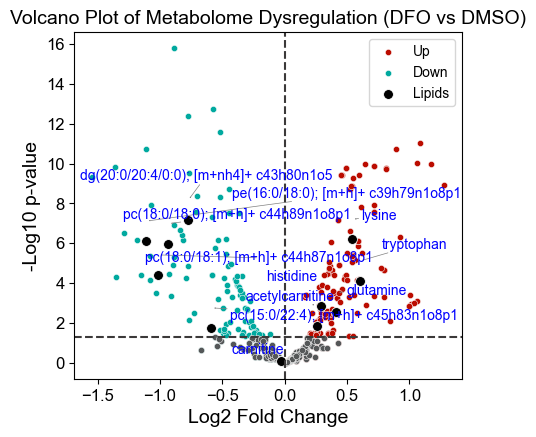

In [109]:
plot_volcano2(results_df,mark_list = glycolytic_metabolites)

In [206]:
def get_drug_df(protein_name, drug_name):
    
    df_drug_pro = dfx.filter(regex=drug_name, axis=1).loc[protein_name].to_frame()
    df_drug_pro['treatment'] = [drug_name]*len(df_drug_pro)
    return df_drug_pro

drug_name_list = ['DMSO','DFO']

def get_full_df(protein_name = '1/sp|P05091|ALDH2_HUMAN',name_list = drug_name_list):
    
    chunks = []      
    for drug_name in name_list:
        dfdf = get_drug_df(protein_name, drug_name)
        chunks.append(dfdf)
    final_df = pd.concat(chunks)
    return final_df 

final_df = dfx
def plot_bar_scatter(protein_name = '1/sp|P05091|ALDH2_HUMAN',df= final_df):
    plt.figure(figsize=(5, 4.5))
    ax = sns.boxplot(x="treatment", y = protein_name,width=0.8, data=df,palette='viridis')
    ax = sns.stripplot(x="treatment", y = protein_name, data=df, color="black",size=12)
    ax.set_xlabel("")
    ax.set_ylabel("Score", fontsize=18)
    ax.tick_params(axis='both', labelsize=18)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
    plt.title(protein_name.split('|')[-1].split('_')[0],fontsize=18)
    plt.show()


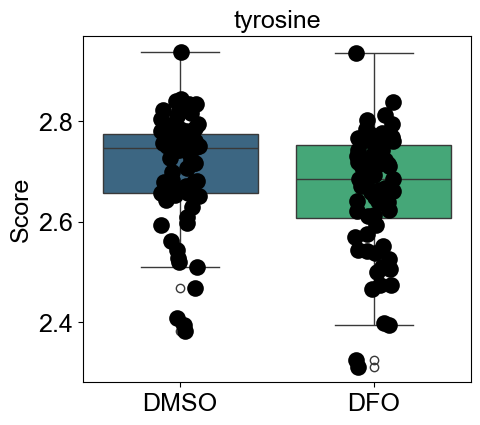

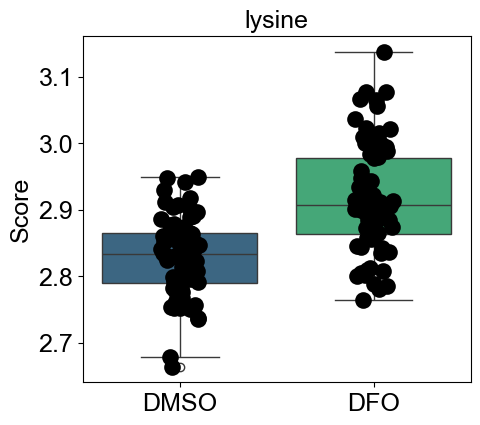

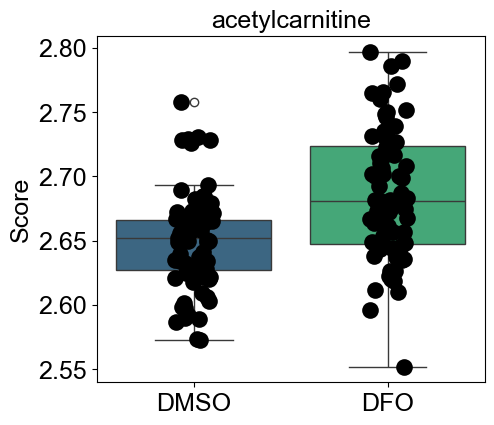

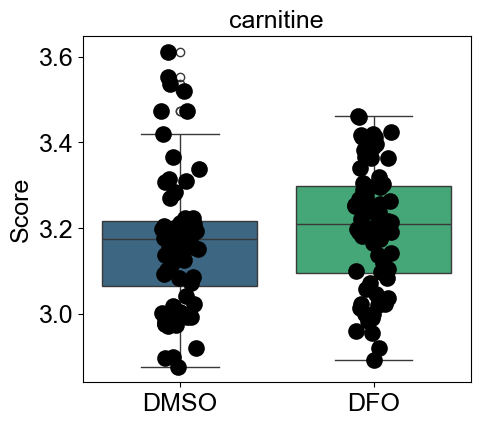

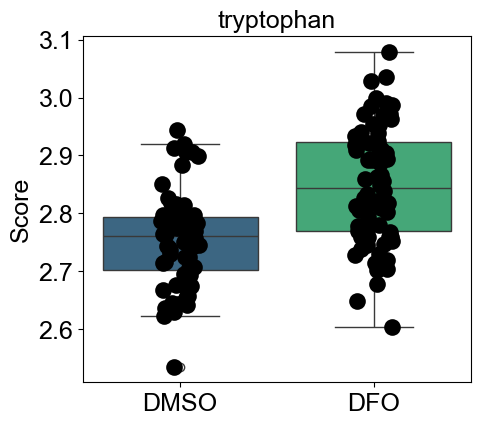

In [207]:
drug_name_list = ['DMSO','DFO']
for protein_name in glycolytic_metabolites[:5]:
    final_df = get_full_df(protein_name ,name_list = drug_name_list)
    plot_bar_scatter(protein_name,df= final_df)

# dysregulation analysis starts here

In [78]:
import re
import math
import statsmodels
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import mannwhitneyu
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

# check CoV

In [114]:
def calculate_cv(row):
    mean = row.mean()
    std_dev = row.std()
    cv = std_dev / mean if mean != 0 else 0
    return cv


In [115]:
interval = 6
chunks = []
total_columns = drugs.shape[1]
num_chunks = total_columns // interval 
cov_dict = {}
cov_dict['DMSO'] = dmso.apply(calculate_cv, axis=1) 
cov_dict['DFO'] = dfo.apply(calculate_cv, axis=1)  
for i in range(0, total_columns, interval):
    # Create a chunk by slicing the DataFrame
    drugcov = drugs.iloc[:, i:i+6].apply(calculate_cv, axis=1)
    drugname_cov = re.sub(r'\d+', '', drugs.iloc[:, i:i+6].columns[1])
    cov_dict[drugname_cov] = drugcov
df_cov = pd.DataFrame(cov_dict)  

In [116]:
def plot_cv_violin(df_long = df_cov.melt(var_name='Drugs', value_name='CV')):
    '''input dataframe format :
    columns as treatments
    rows as CoV values
    '''
    plt.rcParams['font.family'] = 'Arial'
    plt.figure(figsize=(13, 3)) 
    # sns.violinplot(x='Drugs', y='CV', data = df_cov.melt(var_name='Drugs', value_name='CV'))
    sns.violinplot(
        x='Drugs', 
        y='CV', 
        data=df_long, 
        scale='width',       # Adjust the width of the violins
        inner='box',         # Adds a boxplot inside the violin plot
        linewidth=0.5,       # Adjust the linewidth of the violins
        width=0.7,           # Control the width of each violin
        color='#00A99F'       # Use a predefined color palette
    )
    plt.xticks(rotation = 90,fontsize = 9)
    plt.yticks(fontsize = 11)
    plt.xlabel('')
    plt.ylabel('')
    plt.savefig(f'{figure_save_path}/CoV_violinplot.svg',dpi=800,bbox_inches='tight')
    plt.show()

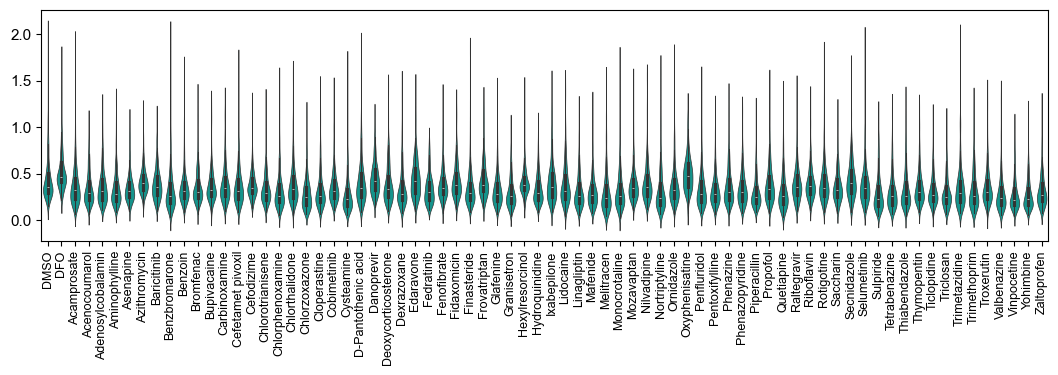

In [117]:
plot_cv_violin(df_long = df_cov.melt(var_name='Drugs', value_name='CV'))

In [495]:
# SS by protein features

# # # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform the data according to rows
# scaled_data = scaler.fit_transform(df_sorted.T).T

# scaled_df = pd.DataFrame(scaled_data, index=df_sorted.index, columns=df_sorted.columns)

# Heatmap analysis

In [125]:
#  calculate mean values of each drug, dmso and dfo 
interval = 6
chunks = []
total_columns = drugs.shape[1]
num_chunks = total_columns // interval 
mean_dict = {}
mean_dict['DMSO'] = dmso.mean(axis = 1).tolist()
mean_dict['DFO'] = dfo.mean(axis = 1).tolist()  
for i in range(0, total_columns, interval):
    # Create a chunk by slicing the DataFrame
    drugmean = drugs.iloc[:, i:i+6].mean(axis = 1).tolist()
    drugname4 = re.sub(r'\d+', '', drugs.iloc[:, i:i+6].columns[3])
    mean_dict[drugname4] = drugmean
df_mean = pd.DataFrame(mean_dict)  
df_mean.index = [item.split('|')[-1].split('_')[0] for item in dfx.index]

In [126]:
df_mean.to_csv(f'{file_save_path}/metabolome_mean.csv')

In [127]:
df_mean

,DMSO,DFO,Acamprosate,Acenocoumarol,Adenosylcobalamin,Aminophylline,Asenapine,Azithromycin,Baricitinib,Benzbromarone,...,Thymopentin,Ticlopidine,Triclosan,Trimetazidine,Trimethoprim,Troxerutin,Valbenazine,Vinpocetine,Yohimbine,Zaltoprofen
1-aminocyclopropane-1-carboxylic acid,81.949082,97.223242,124.529929,92.939666,99.758016,119.330539,97.756028,60.035062,130.403599,120.493014,...,121.905177,106.497508,109.045240,93.863114,73.789769,123.386732,80.454171,141.415441,80.639363,229.138801
1-aminocyclopropanecarboxylate,1454.082706,1353.490034,1522.691408,1779.428276,844.255563,1620.375934,1856.195807,2437.075305,1963.938155,1599.672524,...,2089.416083,1556.303102,1559.866061,1103.506994,1199.522998,1480.706129,1915.784760,1686.228697,1805.085848,2561.853069
proline,2.734191,4.876923,2.475658,2.933988,4.093722,2.361773,3.738542,2.621414,3.133315,2.547030,...,2.399635,3.430050,3.286197,2.029437,2.843644,2.001909,2.531897,2.456745,1.817891,2.142764
indoline,363.779396,499.414263,337.291987,340.976255,443.257627,319.411918,345.681086,332.329510,327.386074,384.151434,...,295.769501,353.549823,336.327437,355.690110,375.848576,308.244011,287.942382,306.731595,290.272266,310.478266
"2,6-xylidine",3.087942,5.219785,3.367875,3.561733,4.323636,3.313032,3.480617,3.167073,2.396744,3.282082,...,2.535103,2.733973,3.310504,3.035641,2.684158,2.847219,2.417468,2.904989,2.393713,2.576704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n1-acetylspermine,3.001250,3.614655,2.960221,2.897493,2.950692,2.908789,2.632388,2.510825,2.749030,2.441034,...,2.584207,2.505836,2.575772,2.473472,2.766605,2.426822,2.303076,2.515506,2.424560,2.493022
"""4-hydroxy-5,7-dimethyl-3-benzylhydroquinolin-2-one",2.129245,2.090613,2.177253,1.821487,2.304699,2.016186,2.103770,2.218831,2.055776,1.762560,...,2.172612,1.751355,2.078728,1.723167,2.103643,1.634737,1.794188,1.880269,1.822774,1.629220
2-amino-2-methylpropanoic acid,39.895917,29.820555,45.562875,37.776665,32.779920,52.034251,36.716237,36.505857,50.847207,66.156728,...,56.055724,40.619923,37.384570,48.465185,62.887576,64.709288,40.840399,68.282554,42.656017,62.361228
3-aminoisobutanoic acid,39.832413,29.718149,45.517864,37.713544,32.807994,51.902973,36.698290,36.466171,50.654314,66.137970,...,56.057189,40.595838,37.356176,48.399332,62.898206,64.651056,40.844831,68.223046,42.614516,62.337677


In [129]:
# Subtract the first column from all columns
col_1 = df_mean.iloc[:, 0]
df_minus_col_1 = df_mean.apply(lambda col: col - col_1, axis=0)
wo_updown = df_minus_col_1.iloc[:,1:]

wo_updown.index = dfx.index
wo_updown.to_csv(f'{file_save_path}/metabolome_up_down.csv')
wo_updown

,DFO,Acamprosate,Acenocoumarol,Adenosylcobalamin,Aminophylline,Asenapine,Azithromycin,Baricitinib,Benzbromarone,Benzoin,...,Thymopentin,Ticlopidine,Triclosan,Trimetazidine,Trimethoprim,Troxerutin,Valbenazine,Vinpocetine,Yohimbine,Zaltoprofen
1-aminocyclopropane-1-carboxylic acid,15.274160,42.580847,10.990584,17.808934,37.381457,15.806946,-21.914020,48.454517,38.543932,-6.342463,...,39.956095,24.548426,27.096157,11.914032,-8.159313,41.437650,-1.494911,59.466359,-1.309719,147.189719
1-aminocyclopropanecarboxylate,-100.592671,68.608702,325.345571,-609.827142,166.293228,402.113102,982.992600,509.855449,145.589818,163.222068,...,635.333377,102.220397,105.783356,-350.575711,-254.559707,26.623423,461.702054,232.145992,351.003142,1107.770363
proline,2.142732,-0.258532,0.199797,1.359531,-0.372418,1.004351,-0.112777,0.399125,-0.187161,-0.067621,...,-0.334556,0.695859,0.552006,-0.704754,0.109454,-0.732282,-0.202294,-0.277446,-0.916299,-0.591427
indoline,135.634867,-26.487409,-22.803141,79.478232,-44.367478,-18.098310,-31.449886,-36.393321,20.372038,-10.913879,...,-68.009895,-10.229573,-27.451958,-8.089286,12.069180,-55.535385,-75.837014,-57.047800,-73.507129,-53.301129
"2,6-xylidine",2.131843,0.279933,0.473791,1.235694,0.225090,0.392674,0.079131,-0.691198,0.194140,0.905290,...,-0.552839,-0.353969,0.222562,-0.052301,-0.403784,-0.240723,-0.670474,-0.182953,-0.694229,-0.511238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n1-acetylspermine,0.613405,-0.041028,-0.103757,-0.050558,-0.092461,-0.368861,-0.490425,-0.252219,-0.560215,-0.255912,...,-0.417042,-0.495414,-0.425478,-0.527778,-0.234645,-0.574427,-0.698173,-0.485744,-0.576690,-0.508227
"""4-hydroxy-5,7-dimethyl-3-benzylhydroquinolin-2-one",-0.038632,0.048008,-0.307759,0.175453,-0.113059,-0.025475,0.089585,-0.073469,-0.366685,0.220949,...,0.043366,-0.377891,-0.050517,-0.406078,-0.025603,-0.494508,-0.335057,-0.248977,-0.306471,-0.500025
2-amino-2-methylpropanoic acid,-10.075361,5.666958,-2.119252,-7.115997,12.138335,-3.179680,-3.390059,10.951290,26.260811,-5.922442,...,16.159808,0.724006,-2.511347,8.569268,22.991659,24.813371,0.944482,28.386637,2.760100,22.465311
3-aminoisobutanoic acid,-10.114264,5.685451,-2.118869,-7.024420,12.070560,-3.134123,-3.366242,10.821900,26.305556,-5.863447,...,16.224776,0.763424,-2.476237,8.566919,23.065793,24.818643,1.012417,28.390633,2.782103,22.505264


In [90]:
# # Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data according to rows
scaled_data = scaler.fit_transform(wo_updown.T).T
new_index = [item.split('|')[-1].split('_')[0] for item in df5.index]
scaled_df2 = pd.DataFrame(scaled_data, index=new_index, columns=wo_updown.columns)
scaled_df2
scaled_df2.to_csv(f'{file_save_path}/metabolome_up_down_scaled.csv')

In [91]:
scaler = StandardScaler()

# # Fit and transform the data according to rows
scaled_data4 = scaler.fit_transform(df5.T).T
new_index4 = [item.split('|')[-1].split('_')[0] for item in df5.index]
scaled_df4 = pd.DataFrame(scaled_data4, index=new_index4, columns=df5.columns)

In [61]:
scaled_df4.T.to_csv(f'{file_save_path}/metabolome_scaled_for_chord.csv')

In [92]:
def plot_heatmap(dfheatmap = dmso,low=-4, high=4):
    
    from matplotlib.colors import LinearSegmentedColormap
    
    colors = ["#437EB8","#8EBBE7","#D8E2EB","white", "#D8E2EB","#EB6CB6","#E72998"]
    n_bins =10 # Number of bins in the color map
    cmap_name = "custom_diverging"
    custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    # Create the heatmap with the custom color map
    plt.figure(figsize=(10, 15))
    ax = sns.heatmap(dfheatmap, annot=False, cmap=custom_cmap, cbar=True, vmin=low, vmax = high,cbar_kws={"shrink": 0.2})
    ax.set_xticks([])
    # # Set the color bar ticks and labels
    # cbar = ax.collections[0].colorbar
    # cbar.set_ticks([-3, -2, -1, 0, 1, 2, 3])
    # cbar.set_ticklabels(['-3', '-2', '-1', '0', '1', '2', '3'])

    # Set the title and labels with custom font size
    # plt.title('Scaled Upregulation and Downregulation Heatmap', fontsize=16)
    plt.xlabel('Metabolome', fontsize=16)
    plt.ylabel('Drug Candidates', fontsize=16)
    plt.xticks(rotation=0, fontsize=8)  # Ensure all x-tick labels are shown
    plt.yticks(fontsize=10)
#     plt.savefig(f'{figure_save_path}/heatmap.svg',dpi=800,bbox_inches='tight')
    # Show the plot
    plt.show()
    
from matplotlib.colors import LinearSegmentedColormap

def plot_clusterheatmap(dfheatmap = scaled_df2,low=-2, high=2):
#     colors = ["#437EB8","#8EBBE7","#D8E2EB","white", "#D8E2EB","#EB6CB6","#E72998"]
#     n_bins =10 # Number of bins in the color map
#     cmap_name = "custom_diverging"
#     custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
    custom_cmap = "viridis"
    # Create the heatmap with the custom color map
    ax = sns.clustermap(dfheatmap, annot=False, cmap=custom_cmap, cbar=True, vmin=low, vmax=high,
                        figsize=(21, 9),  # Set the figure size here
                        row_cluster=True,  # Enable row clustering
                        col_cluster=True,  # Enable column clustering
                        dendrogram_ratio=(.001, .001),  # Minimize the dendrogram size
                        tree_kws={'linewidths': 0})  # Make dendrogram lines invisible
#                         cbar_kws={'orientation': 'vertical',  # 'horizontal' or 'vertical'
#                                   'shrink': 20,  # Adjusts the size of the color bar
#                                   'aspect': 50,  # Adjusts the length-to-width ratio of the color bar
#                                   'pad': 0.1,  # Padding between the heatmap and the color bar
#                                   'label': 'Color Scale'  # Label for the color bar
#                                  })
    # # Set the color bar ticks and labels
    # cbar = ax.collections[0].colorbar
    # cbar.set_ticks([-3, -2, -1, 0, 1, 2, 3])
    # cbar.set_ticklabels(['-3', '-2', '-1', '0', '1', '2', '3'])
    if ax.cax is not None:
        ax.cax.set_visible(False)
#     ax.ax_heatmap.set_xlabel('Regulation Type', fontsize=14)
#     ax.ax_heatmap.set_ylabel('Drug Candidates', fontsize=14)
    ax.ax_heatmap.set_xticklabels([])
#     ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xticklabels(), rotation=90, fontsize=16)  # Customize x-tick labels
    ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_yticklabels(), fontsize=14)  # Customize y-tick labels
    ax.ax_heatmap.tick_params(axis='x', which='both', length=0)
#     plt.xlabel('Regulation Type', fontsize=10)
#     plt.ylabel('Drug Candidates', fontsize=10)
#     plt.xticks([])  # Ensure all x-tick labels are shown
#     plt.yticks(fontsize=10)
#     # Save or display the plot
    # plt.savefig(f'{figure_save_path}/_clustered_heatmap.svg', dpi=800, bbox_inches='tight')
    plt.show()

In [93]:
# plot_clusterheatmap_df(dfheatmap = scaled_df2,low=-2, high=2)

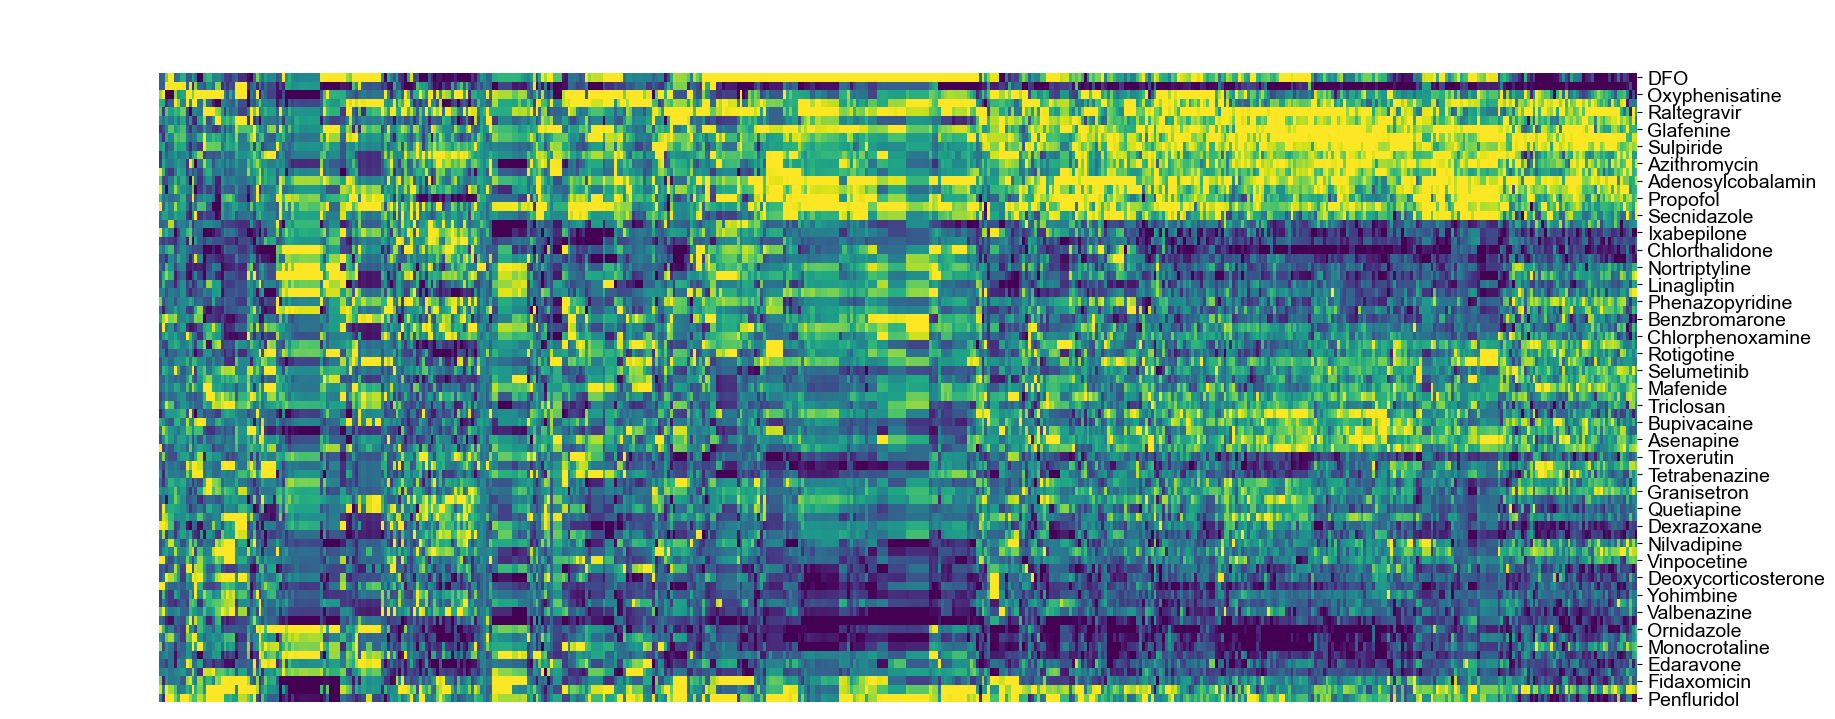

In [94]:
plot_clusterheatmap(dfheatmap = scaled_df2.T,low =-1.5, high=1.5)

In [65]:
# from scipy.cluster.hierarchy import dendrogram, linkage
# from scipy.spatial.distance import pdist

# # Transpose the dataframe to have samples as rows
# data_transposed = scaled_df.T

# # Calculate the distance matrix
# distance_matrix = pdist(data_transposed, metric='euclidean')
# # Perform hierarchical clustering
# Z = linkage(distance_matrix, method='ward')
# # Plot the dendrogram
# plt.figure(figsize=(12, 5))
# dendrogram(Z, labels=data_transposed.index)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Drugs')
# plt.ylabel('Distance')
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 12)
# plt.show()


In [66]:
# from scipy.cluster.hierarchy import fcluster

# # Set a distance threshold to decide the number of clusters
# max_d = 10  # You can adjust this value based on your specific data
# clusters = fcluster(Z, max_d, criterion='distance')

# # Add cluster labels to the original dataframe
# df_clusters = pd.DataFrame({'Sample': data_transposed.index, 'Cluster': clusters})

In [67]:
# df_clusters.sort_values('Cluster')

In [68]:
# plot_clusterheatmap_df(dfheatmap = scaled_df,low=-2, high=2)

# calculate P values by T-test starts here

In [94]:
def bh_correction(p_values):
    _, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')
    return pvals_corrected

def extract_base_name(col_name):
    return re.sub(r'\d+$', '', col_name)
from scipy.stats import ttest_ind

In [95]:
# interval = 6
# chunks = []
# total_columns = drugs.shape[1]
# num_chunks = total_columns // interval 

In [96]:
# Extract unique base drug names
drug_names = [extract_base_name(col) for col in drugs]
drug_names = list(set(drug_names))  # Ensure uniqueness

# Get DMSO replicates
dmso_replicates = dmso

# Initialize a dictionary to store p-values for each protein and each drug
results_dict_t = {}
results_dict_w = {}
# Loop through each drug
for drugn in drug_names:
    # Get replicates for the current drug by matching drug name and any following integer
    drug_replicates = drugs[[col for col in drugs.columns if re.match(f'{drugn}\d+', col)]]
    
    # Perform t-test row-wise for each protein
    results_t = []
    results_w = []
    for idx, row in drugs.iterrows():
        t_stat, pval_t = ttest_ind(drug_replicates.loc[idx], dmso_replicates.loc[idx],equal_var=False)
        u_stat, pval_w = mannwhitneyu(drug_replicates.loc[idx], dmso_replicates.loc[idx],alternative='two-sided')

        results_t.append(pval_t)
        results_w.append(pval_w)
    
    results_dict_t[drugn] = results_t
    results_dict_w[drugn] = results_w


In [97]:
dysregulated = pd.DataFrame(results_dict_t)
dysregulated.index = dmso.index
dysregulated.lt(0.05).sum()

Edaravone              60
D-Pantothenic acid     29
Pentoxifylline         31
Trimethoprim           53
Chlorthalidone         62
                     ... 
Quetiapine             76
Zaltoprofen           127
Frovatriptan           41
Chlorphenoxamine       71
Selumetinib            43
Length: 72, dtype: int64

In [99]:
dysregulated.to_csv(f'{file_save_path}/metabolome_Pvalues.csv')

In [100]:
corrected_dysregulated = dysregulated.apply(bh_correction)
corrected_dysregulated.lt(0.05).sum()

Edaravone             13
D-Pantothenic acid     1
Pentoxifylline         0
Trimethoprim          13
Chlorthalidone         4
                      ..
Quetiapine            24
Zaltoprofen           82
Frovatriptan           1
Chlorphenoxamine      11
Selumetinib            2
Length: 72, dtype: int64

In [101]:
corrected_dysregulated.to_csv(f'{file_save_path}/metabolome_Pvalues_afterBH.csv')

In [11]:
dfdf_p= pd.read_csv(f'{file_save_path}/metabolome_Pvalues_afterBH.csv',index_col = 0)

dys_nums = pd.DataFrame(dfdf_p.lt(0.05).sum())
dys_nums.columns = ['number']
dys_nums = dys_nums.sort_values(by='number')


In [12]:
dys_nums

,number
Carbinoxamine,0
Pentoxifylline,0
Secnidazole,0
Fedratinib,0
Danoprevir,0
...,...
Riboflavin,109
Yohimbine,116
Piperacillin,140
Valbenazine,143


In [13]:
len([item for item in dys_nums['number'] if item >10])

31

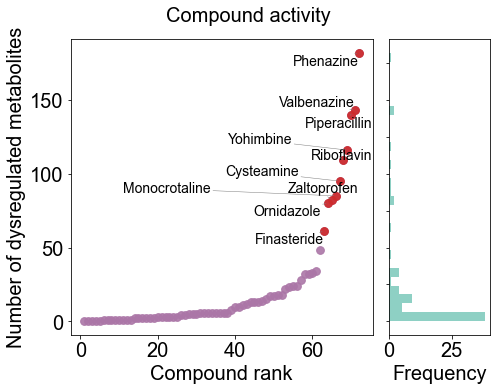

In [48]:
# Prepare your data
# dys_nums is a DataFrame whose index are protein names and with a column 'number'
import matplotlib.pyplot as plt
from adjustText import adjust_text

x = range(1, len(dys_nums) + 1)
y = dys_nums['number'].values

plt.rcParams['font.family'] = 'Arial'
# 1. Create figure & axes in one go (drop the separate plt.figure call)
fig, (ax_scatter, ax_hist) = plt.subplots(
    1, 2,
    figsize=(7, 5.5),
    gridspec_kw={'width_ratios': [3, 1]}
)

# 2. Scatter plot
ax_scatter.scatter(x, y, color='#AB76A7', s=60, alpha=0.9)
ax_scatter.set_xlabel('Compound rank', fontsize=20)
ax_scatter.set_ylabel('Number of dysregulated metabolites', fontsize=20)
ax_scatter.tick_params(axis='x', labelsize=20)
ax_scatter.tick_params(axis='y', labelsize=20)

# 3. Find & label the top 10 proteins
top10 = dys_nums.nlargest(10, 'number')
texts = []
for protein, row in top10.iterrows():
    rank = dys_nums.index.get_loc(protein) + 1
    yval = row['number']
    # optional: highlight the top10 in a different color
    ax_scatter.scatter(rank, yval, color='#CE2B2B', s=60, alpha=0.9)
    texts.append(
        ax_scatter.text(
            rank, yval, protein,
            ha='center', va='bottom',
            fontsize=14
        )
    )

# 4. Adjust labels to avoid overlap
adjust_text(
    texts,
    ax=ax_scatter,
    only_move={'points':'y', 'texts':'y'},
    arrowprops=dict(arrowstyle='-', color='gray', lw=0.5)
)

# 5. Histogram of y on the right
ax_hist.hist(y, orientation='horizontal', color='#8ED0C4', bins=30)
ax_hist.set_xlabel('Frequency', fontsize=20)
ax_hist.tick_params(axis='x', labelsize=20)
ax_hist.set_yticklabels([])

# 6. Title, layout, save & show
fig.suptitle('Compound activity', fontsize=20)
plt.tight_layout()
plt.savefig(f'{figure_save_path}/compound_activity_metabolome.svg', dpi=800, bbox_inches='tight')
plt.show()

<Figure size 700x900 with 0 Axes>

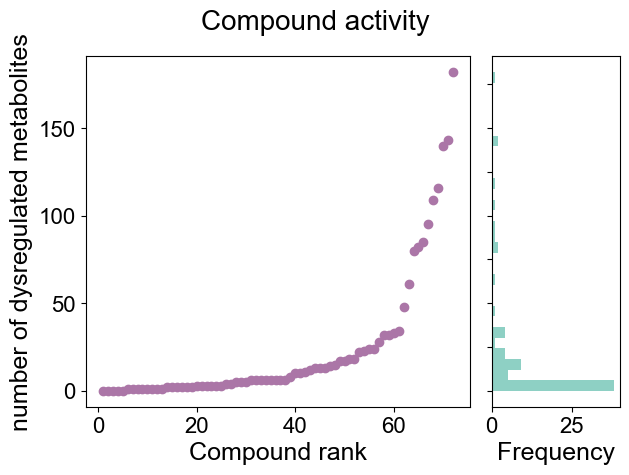

In [105]:
# plot the dysregulation dataset 

x = range(1,73)  # x coordinates
y = dys_nums.number.values # y coordinates
plt.figure(figsize=(7, 9))
# plt.rcParams['font.family'] = 'Arial'

# Create a subplot grid with 1 row and 2 columns
fig, (ax_scatter, ax_hist) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})
# Scatter plot on the first subplot
ax_scatter.scatter(x, y, color='#AB76A7')
ax_scatter.set_xlabel('Compound rank',fontsize=18)
ax_scatter.set_ylabel('number of dysregulated metabolites',fontsize=18)
ax_scatter.tick_params(axis='x', labelsize=16)
ax_scatter.tick_params(axis='y', labelsize=16)
# ax_scatter.set_title('Scatter Plot')

# Histogram of Y values on the second subplot
ax_hist.hist(y, orientation='horizontal', color='#8ED0C4', bins=30)
ax_hist.set_xlabel('Frequency',fontsize=18)
ax_hist.tick_params(axis='x', labelsize=16)
ax_hist.set_yticklabels([])  # Hide y-axis labels for clarity
# ax_hist.set_title('Histogram of Y')
fig.suptitle('Compound activity', fontsize=20)
# Adjust layout to prevent overlap
plt.tight_layout()
# Show plot
plt.show()

In [106]:
corrected_dysregulated

,Edaravone,D-Pantothenic acid,Pentoxifylline,Trimethoprim,Chlorthalidone,Thymopentin,Cobimetinib,Ornidazole,Finasteride,Saccharin,...,Deoxycorticosterone,Trimetazidine,Asenapine,Glafenine,Benzoin,Quetiapine,Zaltoprofen,Frovatriptan,Chlorphenoxamine,Selumetinib
1-aminocyclopropane-1-carboxylic acid,0.500199,0.827214,0.648919,0.854958,0.792180,0.359938,0.765684,0.282510,0.163509,0.991642,...,0.398869,0.839529,0.976721,0.923951,0.982707,0.755531,0.147985,0.682895,0.523614,0.863621
1-aminocyclopropanecarboxylate,0.564639,0.983730,0.959545,0.718947,0.981458,0.656414,0.455087,0.760349,0.163509,0.991642,...,0.717443,0.492793,0.896986,0.685620,0.953996,0.765370,0.275951,0.839901,0.542066,0.975399
proline,0.994612,0.959338,0.880458,0.910020,0.386897,0.694552,0.528802,0.013173,0.114065,0.991642,...,0.521970,0.603720,0.894356,0.880012,0.982707,0.894617,0.375523,0.406257,0.830541,0.723891
indoline,0.928902,0.983730,0.869459,0.886313,0.604791,0.193536,0.467287,0.398454,0.157678,0.991642,...,0.354431,0.951703,0.952577,0.847811,0.940905,0.526870,0.119962,0.611482,0.714829,0.528870
"2,6-xylidine",0.962909,0.959338,0.627141,0.664149,0.919373,0.438674,0.954130,0.271020,0.094847,0.991642,...,0.593959,0.994685,0.925893,0.429373,0.780333,0.982762,0.290098,0.981286,0.842063,0.978832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n1-acetylspermine,0.422039,0.968944,0.637686,0.481180,0.921425,0.372866,0.332027,0.093025,0.019709,0.991642,...,0.541043,0.179816,0.410184,0.887370,0.899426,0.929530,0.035221,0.680649,0.111881,0.880234
"""4-hydroxy-5,7-dimethyl-3-benzylhydroquinolin-2-one",0.933020,0.959338,0.712781,0.910020,0.321183,0.958536,0.964057,0.365198,0.250186,0.991642,...,0.597860,0.043527,0.974627,0.767114,0.922659,0.558086,0.032745,0.391458,0.235417,0.947297
2-amino-2-methylpropanoic acid,0.994612,0.959338,0.596968,0.715900,0.890848,0.629981,0.849712,0.454752,0.331298,0.991642,...,0.438895,0.633345,0.976978,0.880012,0.899426,0.453428,0.443336,0.742590,0.662651,0.702577
3-aminoisobutanoic acid,0.995123,0.959338,0.601363,0.540695,0.874184,0.645621,0.861533,0.477092,0.329844,0.991642,...,0.447764,0.652835,0.960088,0.887370,0.899426,0.520463,0.455268,0.956567,0.621329,0.722931


# metabolites pathway analysis starts here

In [17]:
# ji = [item.split('|')[-1].split('_')[0] for item in dysregulated.index]

dfdf2 = corrected_dysregulated
# dfdf2.index = ji
# dfdf2= dysregulated
dys_metas = pd.DataFrame(dfdf2.T.lt(0.05).sum())
dys_metas.columns = ['number']
dys_metas = dys_metas.sort_values(by='number')

NameError: name 'corrected_dysregulated' is not defined

In [108]:
dys_metas.to_csv(f'{file_save_path}/metabolome_response_rate.csv')

In [40]:
dys_metas2 = pd.read_csv(f'{file_save_path}/metabolome_response_rate.csv', index_col = 0)

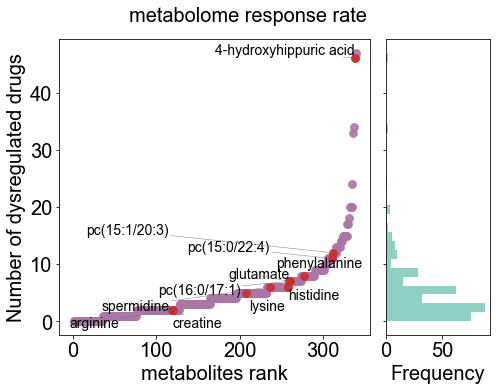

In [51]:

x = range(1, len(dys_metas2) + 1)
y = dys_metas2['number'].values

plt.rcParams['font.family'] = 'Arial'
# 1. Create figure & axes in one go (drop the separate plt.figure call)
fig, (ax_scatter, ax_hist) = plt.subplots(
    1, 2,
    figsize=(7, 5.5),
    gridspec_kw={'width_ratios': [3, 1]}
)

# 2. Scatter plot
ax_scatter.scatter(x, y, color='#AB76A7', s=60, alpha=0.9)
ax_scatter.set_xlabel('metabolites rank', fontsize=20)
ax_scatter.set_ylabel('Number of dysregulated drugs', fontsize=20)
ax_scatter.tick_params(axis='x', labelsize=20)
ax_scatter.tick_params(axis='y', labelsize=20)

# 3. Find & label the metabolites
# Your target labels
label_list = [
    'histidine','glutamate',
   'phenylalanine','pc(16:0/17:1)',
    'pc(15:0/22:4)','pc(15:1/20:3)','spermidine',
    'lysine','arginine','creatine','4-hydroxyhippuric acid'
]

# 3. Label only your list
texts = []
for name in label_list:
    if name in dys_metas2.index:
        rank = dys_metas2.index.get_loc(name) + 1
        yval = dys_metas2.at[name, 'number']
        # highlight this point
        ax_scatter.scatter(rank, yval, color='#CE2B2B', s=60, alpha=0.9)
        texts.append(
            ax_scatter.text(
                rank, yval, name,
                ha='center', va='bottom',
                fontsize=14
            )
        )

# 4. Nudge overlapping labels apart
adjust_text(
    texts,
    ax=ax_scatter,
    only_move={'points':'y', 'texts':'y'},
    arrowprops=dict(arrowstyle='-', color='gray', lw=0.5)
)

# 5. Histogram of y on the right
ax_hist.hist(y, orientation='horizontal', color='#8ED0C4', bins=30)
ax_hist.set_xlabel('Frequency', fontsize=20)
ax_hist.tick_params(axis='x', labelsize=20)
ax_hist.set_yticklabels([])

# 6. Title, layout, save & show
fig.suptitle('metabolome response rate', fontsize=20)
plt.tight_layout()
plt.savefig(f'{figure_save_path}/metabolome_response_rate.svg', dpi=800, bbox_inches='tight')
plt.show()

<Figure size 700x900 with 0 Axes>

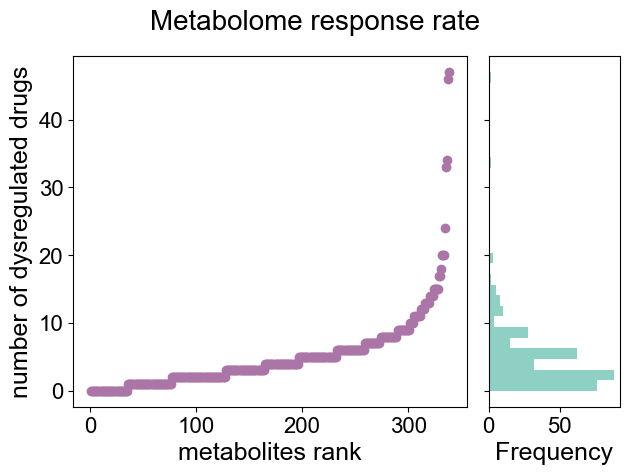

In [109]:
# dysregulated
x = range(1,len(dys_metas)+1)  # x coordinates
y = dys_metas.number.values # y coordinates
plt.figure(figsize=(7, 9))
# plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.family'] = 'Arial'
# Create a subplot grid with 1 row and 2 columns
fig, (ax_scatter, ax_hist) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})
# Scatter plot on the first subplot
ax_scatter.scatter(x, y, color='#AB76A7')
ax_scatter.set_xlabel('metabolites rank',fontsize=18)
ax_scatter.set_ylabel('number of dysregulated drugs',fontsize=18)
ax_scatter.tick_params(axis='x', labelsize=16)
ax_scatter.tick_params(axis='y', labelsize=16)
# ax_scatter.set_title('Scatter Plot')

# Histogram of Y values on the second subplot
ax_hist.hist(y, orientation='horizontal', color='#8ED0C4', bins=30)
ax_hist.set_xlabel('Frequency',fontsize=18)
ax_hist.tick_params(axis='x', labelsize=16)
ax_hist.set_yticklabels([])  # Hide y-axis labels for clarity
# ax_hist.set_title('Histogram of Y')
fig.suptitle('Metabolome response rate', fontsize=20)
# Adjust layout to prevent overlap
plt.tight_layout()
# plt.savefig(f'{figure_save_path}/compound_activity.svg',dpi=800,bbox_inches='tight')
# Show plot
plt.show()

# pathway analysis 

In [343]:
# drugs

In [159]:
amino_acids = [
    'alanine', 'arginine', 'asparagine', 'aspartic acid', 'cysteine', 'glutamine', 'glutamic acid', 'glycine', 'histidine', 'isoleucine',
    'leucine', 'lysine', 'methionine', 'phenylalanine', 'proline','serine', 'threonine', 'tryptophan', 'tyrosine', 'valine'
               ]


In [160]:
lipids = []
for item in drugs.index:
    if "pc(" in item or "pe(" in item or "dg(" in item:
        lipids.append(item)
# lipids 
    

In [506]:
lipid_df = drugs.loc[drugs.index.isin(lipids)]
# lipid_df

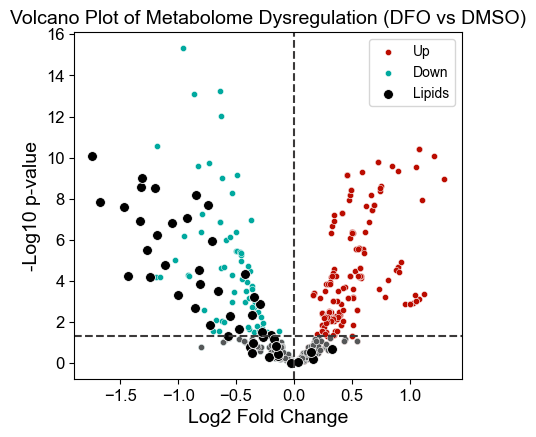

In [507]:
plot_volcano2(results_df,mark_list = lipid_df.index,label_name = "Lipids")  # Lipids upregulated after DFO treat

In [508]:
amino_acid_df = drugs.loc[drugs.index.isin(amino_acids)]
amino_acid_df

,Acamprosate1,Acamprosate2,Acamprosate3,Acamprosate4,Acamprosate5,Acamprosate6,Acenocoumarol1,Acenocoumarol2,Acenocoumarol3,Acenocoumarol4,...,Yohimbine3,Yohimbine4,Yohimbine5,Yohimbine6,Zaltoprofen1,Zaltoprofen2,Zaltoprofen3,Zaltoprofen4,Zaltoprofen5,Zaltoprofen6
index,,,,,,,,,,,,,,,,,,,,,
proline,0.118221,0.261074,0.237338,0.134026,0.121341,0.081153,0.209300,0.132697,-0.016359,0.124614,...,0.065998,0.099341,0.130736,0.077333,0.276690,0.149117,0.079668,0.145602,0.141795,0.058549
lysine,0.240818,0.325030,0.287275,0.363862,0.247458,0.199747,0.218790,0.222412,0.416517,0.198381,...,0.232110,0.164097,0.224555,0.156772,0.225304,0.250474,0.270955,0.220981,0.241221,0.189182
glutamine,0.349353,0.484222,0.259370,0.267003,0.245124,0.196445,0.351684,0.505524,0.687166,0.187805,...,0.100399,0.310023,0.339333,0.212164,0.386685,0.156728,0.338395,0.437215,0.315365,0.193257
histidine,7.985341,8.758854,8.434680,8.807602,8.916067,6.934330,7.935568,8.468875,10.867997,6.566961,...,6.999580,6.446059,6.582121,5.551272,7.633256,5.016092,4.117072,6.814902,7.817212,6.590882
phenylalanine,1.480855,1.285541,1.110321,1.267894,1.131456,1.105473,0.904479,1.264504,1.136390,1.112604,...,1.104014,1.115360,1.067869,1.065281,1.209104,1.325745,1.044627,1.185383,1.093235,1.024301
arginine,3.218626,1.491894,1.247343,8.486264,1.042749,0.252094,2.852397,1.249736,0.731342,0.517480,...,1.466522,0.578450,1.147431,0.453590,-0.117434,1.046561,0.874219,0.717027,1.211875,0.309952
tryptophan,0.173267,0.149020,0.106489,0.120934,0.113673,0.089829,0.099560,0.112373,0.174558,0.095698,...,0.186750,0.094477,0.138782,0.113320,0.148026,0.054854,0.172290,0.117841,0.113330,0.061484
isoleucine,0.110132,0.072748,0.159662,0.094014,0.081954,0.071774,0.085052,0.124001,0.055118,0.095463,...,0.065754,0.086089,0.094031,0.080736,0.075805,0.085711,0.064433,0.085853,0.089540,0.073550
tyrosine,0.166803,0.147293,0.125684,0.281387,0.084078,0.120441,0.156744,0.098104,0.187573,0.040141,...,0.192280,0.100667,0.122727,0.265293,0.172307,0.101091,0.126189,0.138003,0.194959,0.170888


In [509]:
DatasetNormalizeDf.standardscaler(amino_acid_df.T)

index,proline,lysine,glutamine,histidine,phenylalanine,arginine,tryptophan,isoleucine,tyrosine
Acamprosate1,-0.427386,-0.049021,0.620898,-0.102386,2.332618,1.425730,0.509051,0.838270,0.083574
Acamprosate2,1.041472,1.084049,1.685989,0.248935,0.968020,0.125902,0.136010,-0.456430,-0.186157
Acamprosate3,0.797405,0.576055,-0.089713,0.101699,-0.256192,-0.058189,-0.518326,2.553621,-0.484916
Acamprosate4,-0.264877,1.606536,-0.029433,0.271076,0.844720,5.391039,-0.296089,0.280079,1.667756
Acamprosate5,-0.395309,0.040320,-0.202217,0.320340,-0.108532,-0.212201,-0.407810,-0.137612,-1.060129
...,...,...,...,...,...,...,...,...,...
Zaltoprofen2,-0.109702,0.080896,-0.900293,-1.450989,1.248909,-0.209331,-1.312737,-0.007491,-0.824923
Zaltoprofen3,-0.823798,0.356468,0.534361,-1.859315,-0.715177,-0.339065,0.494025,-0.744405,-0.477929
Zaltoprofen4,-0.145847,-0.315923,1.314765,-0.633988,0.268245,-0.457394,-0.343676,-0.002570,-0.314590
Zaltoprofen5,-0.184988,-0.043598,0.352493,-0.178749,-0.375571,-0.084888,-0.413075,0.125124,0.472852


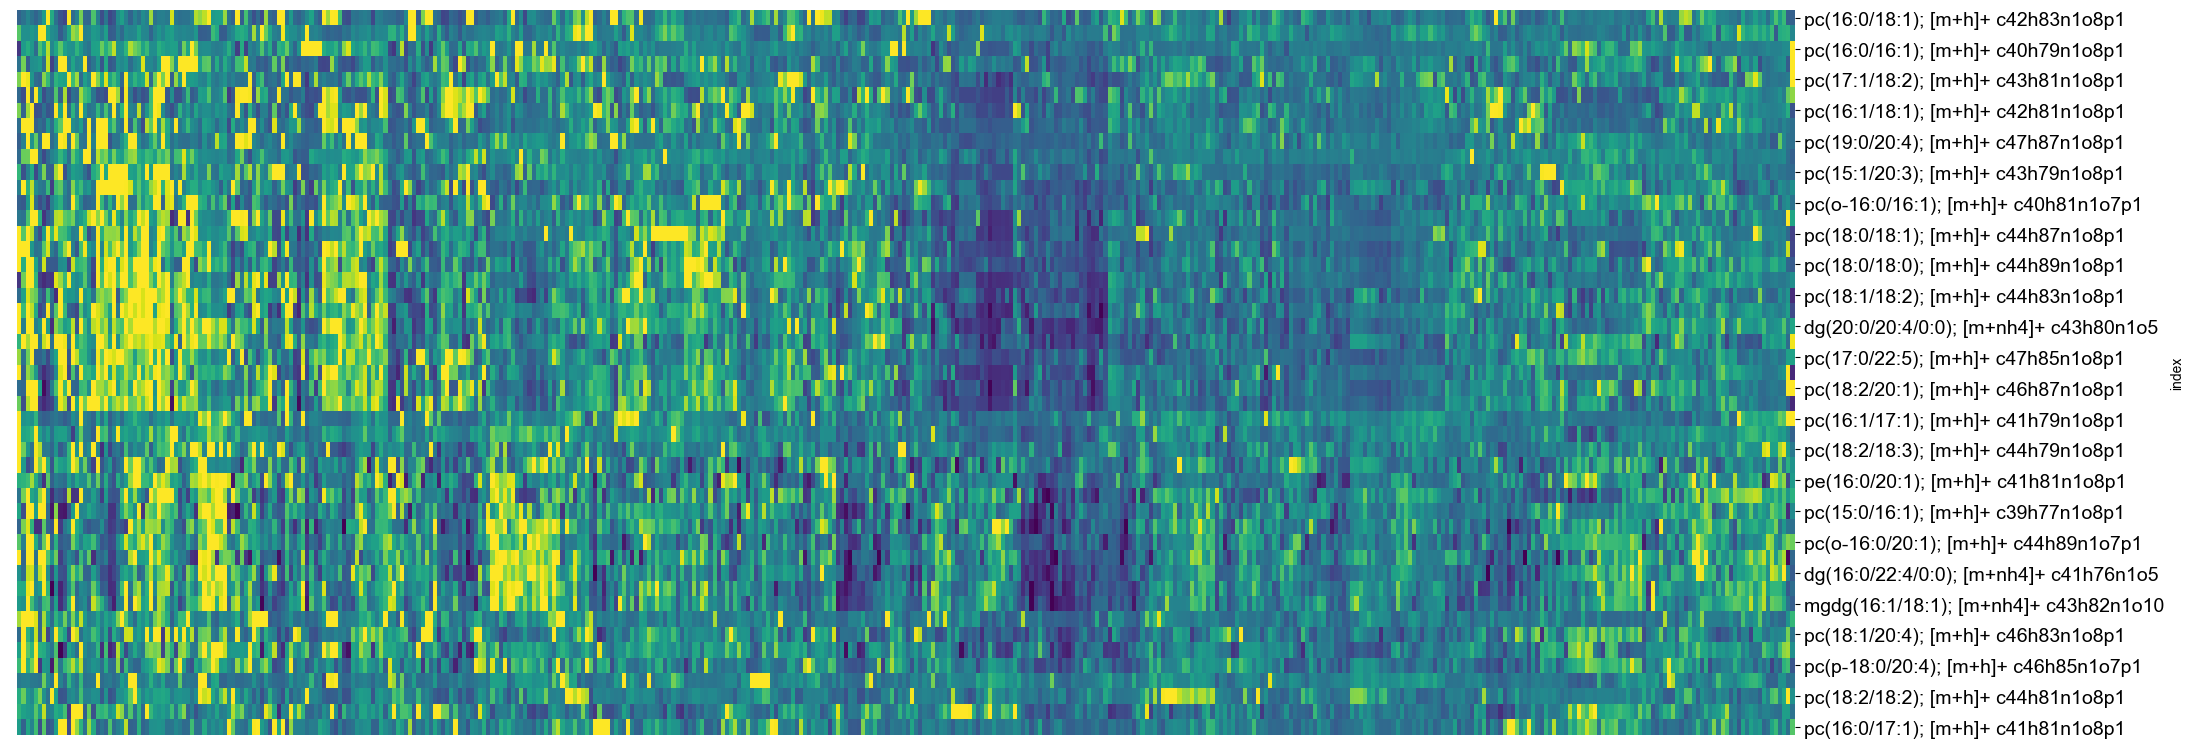

In [510]:
 plot_clusterheatmap(dfheatmap = DatasetNormalizeDf.standardscaler(lipid_df.T).T,low=-2, high=2)

In [79]:
lipid_df

NameError: name 'lipid_df' is not defined

In [12]:
plot_volcano2(results_df,mark_list = amino_acid_df.index,label_name = "Amino acids")    # amino acids upregulated after DFO treat 

NameError: name 'results_df' is not defined

# correlation among drugs


In [72]:
wo_updown

,DFO,Acamprosate,Acenocoumarol,Adenosylcobalamin,Aminophylline,Asenapine,Azithromycin,Baricitinib,Benzbromarone,Benzoin,...,Thymopentin,Ticlopidine,Triclosan,Trimetazidine,Trimethoprim,Troxerutin,Valbenazine,Vinpocetine,Yohimbine,Zaltoprofen
index,,,,,,,,,,,,,,,,,,,,,
1-aminocyclopropane-1-carboxylic acid,-0.119251,3.259270,0.596072,0.905156,2.619014,1.279160,-1.114179,4.228559,2.200024,-0.712174,...,2.564660,0.448318,1.604817,0.458656,-0.833943,2.669228,0.236836,4.296431,-0.138734,10.150159
1-aminocyclopropanecarboxylate,-11.204650,3.112416,10.638408,-48.714195,10.197185,33.152065,85.356849,44.649186,6.279769,11.649632,...,54.322180,-2.074185,-0.721377,-34.386424,-26.033232,-0.234197,40.473018,19.228342,34.494005,93.491919
proline,0.122208,-0.008194,0.014062,0.070546,-0.023199,0.072130,0.007718,0.035756,-0.015407,-0.000726,...,-0.014930,0.034354,0.028329,-0.046035,-0.003163,-0.044525,0.002602,-0.005556,-0.051793,-0.025148
"indoline|indoline|2,3-dihydro-1h-indole",7.026895,-1.138752,-1.854384,3.641803,-2.287710,-1.085840,-1.591764,-1.826367,2.134270,-0.574271,...,-3.746362,-1.320145,-2.022151,-0.946923,0.277179,-3.035649,-4.125827,-2.844403,-3.957661,-2.755263
indoline,7.026895,-1.138752,-1.854384,3.641803,-2.287710,-1.085840,-1.591764,-1.826367,2.134270,-0.574271,...,-3.746362,-1.320145,-2.022151,-0.946923,0.277179,-3.035649,-4.125827,-2.844403,-3.957661,-2.755263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""4-hydroxy-5,7-dimethyl-3-benzylhydroquinolin-2-one",-0.011365,0.012380,-0.021547,-0.003242,-0.004098,-0.000748,0.011047,0.008099,-0.024993,0.001715,...,-0.005532,-0.032065,-0.006938,-0.029795,-0.006374,-0.032706,-0.024773,-0.014080,-0.024237,-0.027168
2-amino-2-methylpropanoic acid,-1.186229,0.594685,-0.232022,-0.544007,1.485770,-0.141031,0.281951,1.324667,1.603488,-0.379295,...,1.331035,-0.594370,0.020766,0.563464,1.831444,1.960528,0.445362,1.872665,0.686050,1.901689
3-aminoisobutanoic acid,-1.177818,0.588912,-0.238045,-0.547808,1.451408,-0.138805,0.272057,1.303591,1.605302,-0.374116,...,1.328587,-0.591561,0.017665,0.557452,1.820113,1.947539,0.446038,1.865424,0.684946,1.900942


In [73]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity


df = wo_updown
# Assuming your dataframe is named df
column_vectors = df.columns
n = len(column_vectors)

# Initialize an empty matrix to store correlations
correlation_matrix = np.zeros((n, n))

# Calculate pairwise correlation manually between every two vectors (columns)
for i in range(n):
    for j in range(n):
        # Calculate correlation between column i and column j
        correlation_matrix[i, j] = np.corrcoef(df[column_vectors[i]], df[column_vectors[j]])[0, 1]

# Convert the matrix to a DataFrame for better visualization and manipulation
correlation_df = pd.DataFrame(correlation_matrix, index=column_vectors, columns=column_vectors)

correlation_df2 = df.corr(method='pearson')

df_transposed = df.T

# Compute cosine similarity between the columns (now rows after transpose)
cosine_sim_matrix = cosine_similarity(df_transposed)

# Convert the result to a DataFrame for better visualization
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df.columns, columns=df.columns)

In [74]:
# correlation_df2 

In [75]:
# cosine_sim_df

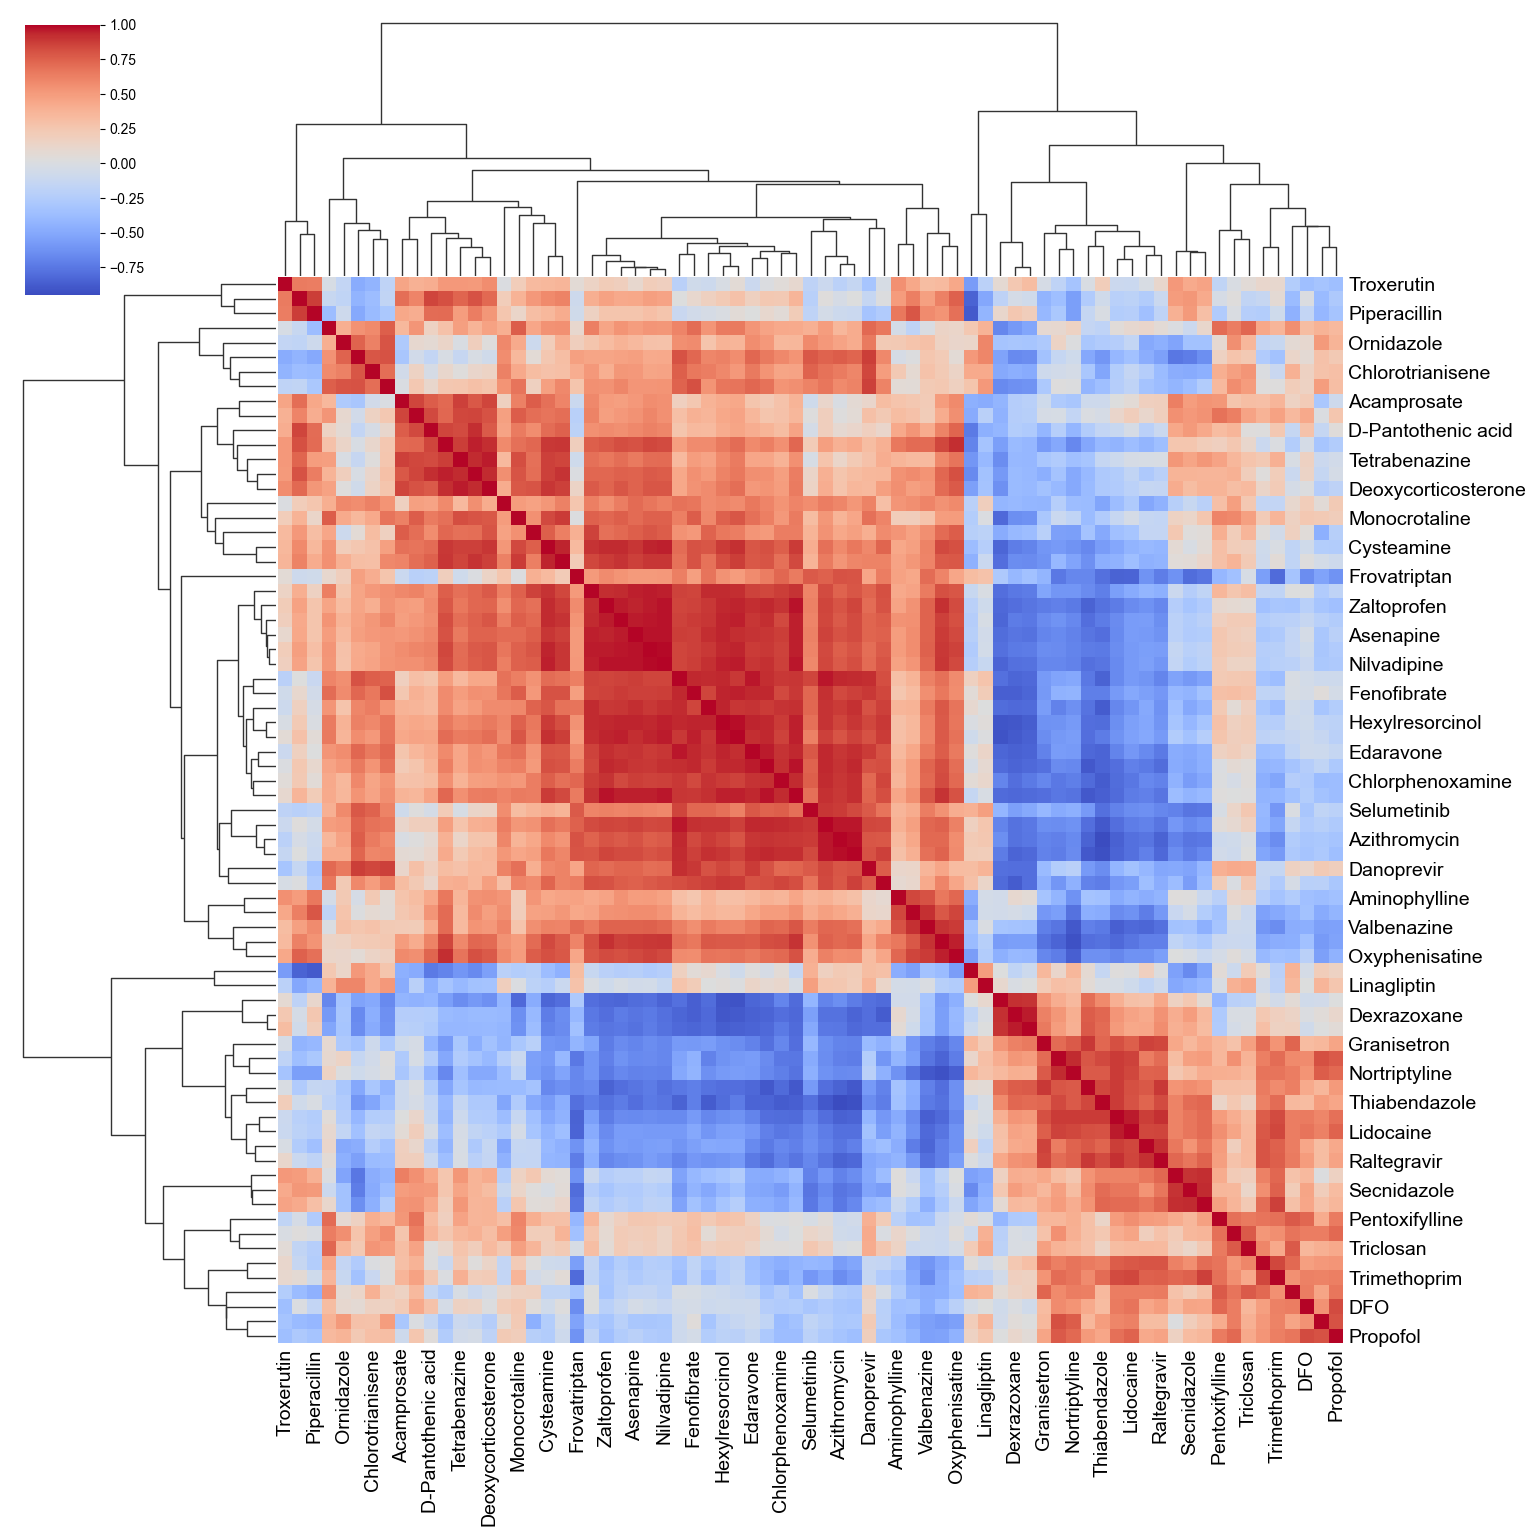

In [76]:

ax = sns.clustermap(correlation_df, cmap='coolwarm', fmt='.2f', figsize=(15,15),
                        row_cluster=True,  # Enable row clustering
                        col_cluster=True,  # Enable column clustering
                        tree_kws={'linewidths': 1}) 
  
ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_yticklabels(),fontsize=14)

ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xticklabels(), fontsize=14)
ax.ax_heatmap.tick_params(axis='both', which='both', length=0)
# plt.tight_layout()
plt.show()

In [78]:
correlation_df.to_csv(f'{file_save_path}/metabolome_correlation.csv')

# pathway analysis starts here

In [137]:
df_mean

,DMSO,DFO,Acamprosate,Acenocoumarol,Adenosylcobalamin,Aminophylline,Asenapine,Azithromycin,Baricitinib,Benzbromarone,...,Thymopentin,Ticlopidine,Triclosan,Trimetazidine,Trimethoprim,Troxerutin,Valbenazine,Vinpocetine,Yohimbine,Zaltoprofen
1-aminocyclopropane-1-carboxylic acid,5.464683,5.345433,8.723953,6.060755,6.369839,8.083698,6.743843,4.350505,9.693242,7.664708,...,8.029344,5.913001,7.069500,5.923339,4.630740,8.133911,5.701520,9.761114,5.325950,15.614842
1-aminocyclopropanecarboxylate,104.231039,93.026389,107.343454,114.869447,55.516844,114.428223,137.383104,189.587887,148.880225,110.510807,...,158.553218,102.156854,103.509661,69.844615,78.197806,103.996842,144.704056,123.459380,138.725043,197.722958
proline,0.167052,0.289261,0.158859,0.181114,0.237598,0.143854,0.239182,0.174770,0.202808,0.151645,...,0.152123,0.201407,0.195381,0.121017,0.163889,0.122528,0.169654,0.161496,0.115259,0.141904
"2,3-dihydro-1h-indole",20.927227,27.954122,19.788475,19.072843,24.569030,18.639517,19.841387,19.335463,19.100860,23.061497,...,17.180865,19.607082,18.905076,19.980304,21.204406,17.891578,16.801401,18.082824,16.969566,18.171964
indoline,20.927227,27.954122,19.788475,19.072843,24.569030,18.639517,19.841387,19.335463,19.100860,23.061497,...,17.180865,19.607082,18.905076,19.980304,21.204406,17.891578,16.801401,18.082824,16.969566,18.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""4-hydroxy-5,7-dimethyl-3-benzylhydroquinolin-2-one",0.151283,0.139918,0.163663,0.129736,0.148041,0.147185,0.150535,0.162330,0.159382,0.126290,...,0.145751,0.119218,0.144345,0.121488,0.144909,0.118577,0.126510,0.137203,0.127047,0.124115
2-amino-2-methylpropanoic acid,2.531081,1.344852,3.125766,2.299059,1.987074,4.016851,2.390050,2.813032,3.855748,4.134568,...,3.862116,1.936710,2.551847,3.094545,4.362525,4.491609,2.976443,4.403746,3.217131,4.432770
3-aminoisobutanoic acid,2.522923,1.345105,3.111835,2.284879,1.975116,3.974332,2.384118,2.794980,3.826514,4.128225,...,3.851510,1.931362,2.540588,3.080375,4.343037,4.470462,2.968961,4.388348,3.207869,4.423865
3-indolylacetonitrile,0.881042,1.116562,0.675118,0.928888,0.882927,0.878579,0.918227,0.823232,0.843050,1.160417,...,0.730660,0.742614,0.851569,0.806203,0.891002,0.664418,0.639529,0.703913,0.663943,0.720687


In [139]:
scaled_df2.index

Index(['1-aminocyclopropane-1-carboxylic acid',
       '1-aminocyclopropanecarboxylate', 'proline', '2,3-dihydro-1h-indole',
       'indoline', '2-amino-1-phenylethanol', '2,6-xylidine',
       '2,6-dimethylaniline', '2,4,6-trimethylpyridin',
       '2,4,6-trimethylpyridine',
       ...
       'pc(19:0/20:4); [m+h]+ c47h87n1o8p1', 'roxane', 'n-formyl-l-methionine',
       'n-formyl-methionine', 'n1-acetylspermine',
       '"4-hydroxy-5,7-dimethyl-3-benzylhydroquinolin-2-one',
       '2-amino-2-methylpropanoic acid', '3-aminoisobutanoic acid',
       '3-indolylacetonitrile', '3-indoleacetonitrile'],
      dtype='object', length=507)

In [141]:
import bioservices

Creating directory C:\Users\jiangy5\AppData\Local\bioservices\bioservices 


In [142]:
from bioservices import KEGG

In [161]:
df_mean.loc[df_mean.index.isin(amino_acids)]      

,DMSO,DFO,Acamprosate,Acenocoumarol,Adenosylcobalamin,Aminophylline,Asenapine,Azithromycin,Baricitinib,Benzbromarone,...,Thymopentin,Ticlopidine,Triclosan,Trimetazidine,Trimethoprim,Troxerutin,Valbenazine,Vinpocetine,Yohimbine,Zaltoprofen
proline,0.167052,0.289261,0.158859,0.181114,0.237598,0.143854,0.239182,0.174770,0.202808,0.151645,...,0.152123,0.201407,0.195381,0.121017,0.163889,0.122528,0.169654,0.161496,0.115259,0.141904
lysine,0.266737,0.379232,0.277365,0.253371,0.264239,0.232639,0.258558,0.229590,0.212009,0.307936,...,0.205156,0.254646,0.282538,0.283827,0.240892,0.229139,0.173904,0.218485,0.205991,0.233020
glutamine,0.250909,0.330174,0.300253,0.389920,0.243766,0.294495,0.313788,0.291043,0.347861,0.253931,...,0.295824,0.248171,0.319780,0.166973,0.310966,0.176734,0.277141,0.263600,0.233545,0.304608
histidine,9.266517,10.961042,8.306146,8.426180,9.354876,7.438998,9.831081,8.760711,6.900232,10.339502,...,7.624541,8.023873,8.352111,8.757217,8.691407,8.088696,6.002942,7.990266,6.867450,6.331569
phenylalanine,1.181189,1.322597,1.230257,1.103538,1.256400,1.090645,1.153008,1.257972,1.234060,1.130729,...,1.085230,1.149950,1.094892,1.109989,1.226744,1.053190,1.059997,1.080028,1.102569,1.147066
arginine,1.336787,2.732835,2.623162,1.148568,1.339665,0.773879,1.499889,0.794025,0.802146,2.081504,...,1.115082,1.894042,2.067716,1.182762,1.246688,0.998728,0.680535,1.127726,1.210977,0.673700
tryptophan,0.170814,0.227147,0.125535,0.136249,0.167124,0.112406,0.160574,0.190231,0.106072,0.146125,...,0.125004,0.108605,0.104849,0.154295,0.140339,0.129889,0.102225,0.135741,0.117956,0.111304
isoleucine,0.095698,0.103189,0.098381,0.090002,0.111903,0.077280,0.088223,0.092952,0.088680,0.075483,...,0.082216,0.069239,0.094815,0.067428,0.086862,0.069842,0.079247,0.081928,0.077282,0.079149
tyrosine,0.160630,0.123108,0.154281,0.131821,0.212903,0.205787,0.171241,0.197645,0.178447,0.166271,...,0.173267,0.132429,0.147706,0.145743,0.122464,0.199709,0.134784,0.135415,0.139772,0.150573


In [162]:

kegg = KEGG()
metabolite = 'histidine' # Example KEGG ID
pathway_info = kegg.find("compound",metabolite)
print(pathway_info)




cpd:C00135	L-Histidine; (S)-alpha-Amino-1H-imidazole-4-propionic acid
cpd:C00386	Carnosine; Nalpha-(beta-alanyl)-L-histidine
cpd:C00615	Protein histidine; Protein L-histidine; [Protein]-L-histidine
cpd:C00768	Histidine; alpha-Amino-1H-imidazole-4-propionic acid
cpd:C00884	Homocarnosine; L-Homocarnosine; gamma-Aminobutyryl histidine; N-(4-Amino-1-oxobutyryl)histidine
cpd:C01152	N(pi)-Methyl-L-histidine; N-pros-Methyl-L-histidine; 3-Methylhistidine; 1-Methylhistidine
cpd:C01262	beta-Alanyl-N(pi)-methyl-L-histidine; Anserine
cpd:C02997	N-Acetyl-L-histidine
cpd:C03095	N-Aminoacyl-L-histidine
cpd:C03298	Nalpha-Methylhistidine; N-Methyl-L-histidine
cpd:C04087	Protein N(tau)-methyl-L-histidine; Protein N-tele-methyl-L-histidine
cpd:C04259	N,N-Dimethylhistidine; Nalpha,Nalpha-Dimethyl-L-histidine
cpd:C04261	Protein N(pi)-phospho-L-histidine; Protein N-pros-phospho-L-histidine; Protein N-pros-phosphohistidine; Protein Npi-phospho-L-histidine
cpd:C04262	Protein N(tau)-phospho-L-histidine; Protei

#  calculate fold_change between DMSO and drugs 

In [79]:
#  calculate fold_change between DMSO and drugs 

foldchange_dict = {}
for i in range(0, total_columns, interval):
    # Create a chunk by slicing the DataFrame
    drugname3 = drugs.iloc[:, i:i+6].columns[2]
    fc_results = []
    
    for j in range(drugs.shape[0]):
        dmsopro = dmso.iloc[j, :30].mean()
        drugpro = drugs.iloc[j, i:i+6].mean()
        
        # Calculate the p-value of the t-test between drug and DMSO profiles
        fold_change = drugpro/dmsopro
        fc_results.append(fold_change)
    
    foldchange_dict[drugname3] = fc_results

In [146]:
# dmso.mean(axis = 1).tolist()
# dfo.mean(axis = 1).tolist()

In [149]:
len(drugs.iloc[:, :6].mean(axis = 1).tolist())

887

In [61]:
#  calculate mean values of each drug, dmso and dfo 

mean_dict = {}
mean_dict['DMSO'] = dmso.mean(axis = 1).tolist()



for i in range(0, total_columns, interval):
    # Create a chunk by slicing the DataFrame
    drugmean = drugs.iloc[:, i:i+6].mean(axis = 1).tolist()
    drugname4 = drugs.iloc[:, i:i+6].columns[3]
    mean_dict[drugname4] = drugmean

mean_dict['DFO'] = dfo.mean(axis = 1).tolist()    
df_mean = pd.DataFrame(mean_dict)   

In [107]:
# Subtract the first column from all columns
col_1 = df_mean.iloc[:, 0]
df_minus_col_1 = df_mean.apply(lambda col: col - col_1, axis=0)
wor = df_minus_col_1.iloc[:,1:]

wor.index = dmso.index
# # Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data according to rows
scaled_data = scaler.fit_transform(wor.T).T

scaled_df2 = pd.DataFrame(scaled_data, index=wor.index, columns=wor.columns)

In [131]:
wor.to_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\new_druganalysis\dysregulated_proteome_afterBH_mean.csv')

In [112]:
# plot_heatmap_df(dfheatmap = scaled_df2,low=-2, high=2)
# plot_clusterheatmap_df(dfheatmap = scaled_df2,low=-2, high=2)

In [113]:
# plot_clusterheatmap_df(dfheatmap = scaled_df2,low=-2, high=2)

In [80]:
df_foldchange = pd.DataFrame(foldchange_dict)
df_foldchange.index = dmso.index
df_foldchange

,Acamprosate3,Acenocoumarol3,Adenosylcobalamin3,Aminophylline3,Asenapine3,Azithromycin3,Baricitinib3,Benzbromarone3,Benzoin3,Bromfenac3,...,Thymopentin3,Ticlopidine3,Triclosan3,Trimetazidine3,Trimethoprim3,Troxerutin3,Valbenazine3,Vinpocetine3,Yohimbine3,Zaltoprofen3
1/contam_sp|P00761|TRYP_PIG,0.949126,1.046065,0.977254,1.113120,1.044289,1.019135,1.019680,0.891190,1.086159,1.025693,...,1.017159,1.104404,1.007840,1.016600,0.943785,0.912201,1.045844,1.007863,0.983546,0.876073
1/contam_sp|P02769|ALBU_BOVIN,0.921984,0.983195,0.973488,1.033257,0.983904,1.003300,1.052931,0.814295,1.054041,0.978637,...,0.987057,1.060490,0.916650,0.952116,0.879927,0.883901,0.987046,0.909668,0.932011,0.877567
1/sp|A6NHQ2|FBLL1_HUMAN,0.415413,0.636746,0.569925,0.565416,0.924934,1.142791,0.997349,0.834472,1.009735,1.436759,...,1.118941,0.808265,0.808165,0.727820,1.089189,0.225249,1.095267,0.818441,1.315473,0.651251
1/sp|O00148|DX39A_HUMAN,0.902588,1.015030,0.983975,1.093703,0.958343,0.991505,0.977755,0.887081,1.063983,1.009183,...,1.012142,1.011957,0.997374,0.940197,0.954846,0.890221,1.003368,0.964661,0.961508,0.924418
1/sp|O00154|BACH_HUMAN,0.991861,0.909619,1.031282,1.131856,1.138919,1.033774,1.001478,0.875256,1.163000,1.066812,...,0.999614,1.081167,0.960867,0.890053,1.087076,0.848688,0.941429,1.098518,0.887871,0.895065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/sp|P04908|H2A1B_HUMAN/sp|Q7L7L0|H2A3_HUMAN/sp|Q93077|H2A1C_HUMAN,0.953853,1.029854,0.989323,1.042039,1.037147,1.031649,1.020565,0.890019,1.093218,1.044004,...,1.028870,1.080936,0.980822,1.003819,0.975577,0.916951,1.014904,0.986855,0.955952,0.882207
3/sp|P0DP23|CALM1_HUMAN/sp|P0DP24|CALM2_HUMAN/sp|P0DP25|CALM3_HUMAN,0.911961,1.070435,0.995812,1.097760,1.103220,0.996041,0.950995,0.868068,1.104520,1.002928,...,1.055308,1.034096,0.968994,1.044160,1.050072,0.954896,1.001299,1.007370,0.955407,0.783914
3/sp|P10412|H14_HUMAN/sp|P16402|H13_HUMAN/sp|P16403|H12_HUMAN,0.923955,1.032523,0.999118,1.066248,1.032163,0.996611,1.013690,0.888057,1.038405,1.057627,...,1.012876,1.066839,1.010982,1.015294,0.986965,0.918588,1.002175,0.967752,0.939896,0.864822
3/sp|P38405|GNAL_HUMAN/sp|P63092|GNAS2_HUMAN/sp|Q5JWF2|GNAS1_HUMAN,0.617219,0.725617,0.982494,0.646937,0.621243,0.895650,0.863805,0.551251,1.096790,0.600967,...,0.667983,0.793656,0.245066,0.678787,20.944043,0.451275,1.158647,0.974935,0.606588,0.279996


filter the proteins significantly dysregulated in each drug

In [117]:
final = pd.concat([corrected_dysregulated,df_foldchange], axis=1)
final = final[sorted(final.columns)]

In [121]:
updown_dict = {}

for num in range(72):
    
    drugdf = final.iloc[:,[num, num+72]]
    
    drug_candidate = drugdf.columns[1]
    
    hahaha = drugdf[drugdf.iloc[:, 0] < 0.05].iloc[:,1]
    
    upregu = (hahaha > 1).sum()
    downregu = (hahaha < 1).sum()
    updown_dict[drug_candidate] = {'upregu': upregu, 'downregu': downregu}

In [123]:
fcfc = pd.DataFrame(updown_dict).T

In [124]:
fcfc 

,upregu,downregu
Lidocaine2,0,126
Lidocaine3,0,16
Linagliptin2,0,10
Linagliptin3,5,12
Mafenide2,0,4
...,...,...
Vinpocetine3,3,13
Yohimbine2,0,7
Yohimbine3,7,11
Zaltoprofen2,0,20


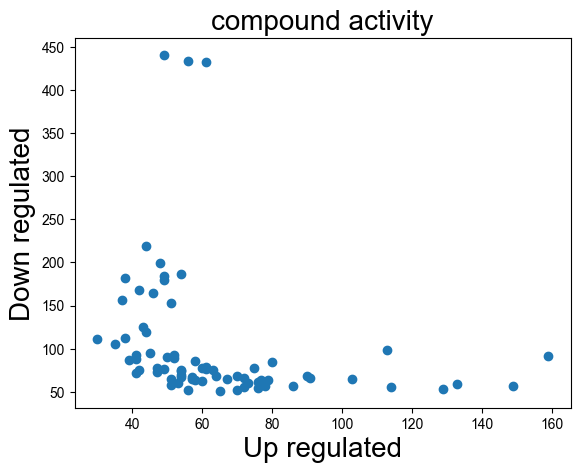

In [133]:
# Create the scatter plot

plt.rcParams['font.family'] = 'Arial'
plt.scatter((df_foldchange > 1.3).sum().tolist(), (df_foldchange < 0.7).sum().tolist())

# Optional: Add titles and labels
plt.title('compound activity',fontsize=20)
plt.xlabel('Up regulated',fontsize=20)
plt.ylabel('Down regulated',fontsize=20)

# Show the plot
plt.show()

In [487]:
tar_df = dfdf3T.iloc[:646,:].replace(0, np.nan)

In [488]:
tar_df

,1/contam_sp|P00761|TRYP_PIG,1/contam_sp|P02769|ALBU_BOVIN,1/sp|A6NHQ2|FBLL1_HUMAN,1/sp|O00148|DX39A_HUMAN,1/sp|O00154|BACH_HUMAN,1/sp|O00231|PSD11_HUMAN,1/sp|O00232|PSD12_HUMAN,1/sp|O00264|PGRC1_HUMAN,1/sp|O00273|DFFA_HUMAN,1/sp|O00299|CLIC1_HUMAN,...,2/sp|Q13885|TBB2A_HUMAN/sp|Q9BVA1|TBB2B_HUMAN,2/sp|Q14151|SAFB2_HUMAN/sp|Q15424|SAFB1_HUMAN,2/sp|Q16777|H2A2C_HUMAN/sp|Q6FI13|H2A2A_HUMAN,2/sp|Q6DN03|H2B2C_HUMAN/sp|Q6DRA6|H2B2D_HUMAN,2/sp|Q92928|RAB1C_HUMAN/sp|Q9H0U4|RAB1B_HUMAN,3/sp|P04908|H2A1B_HUMAN/sp|Q7L7L0|H2A3_HUMAN/sp|Q93077|H2A1C_HUMAN,3/sp|P0DP23|CALM1_HUMAN/sp|P0DP24|CALM2_HUMAN/sp|P0DP25|CALM3_HUMAN,3/sp|P10412|H14_HUMAN/sp|P16402|H13_HUMAN/sp|P16403|H12_HUMAN,3/sp|P38405|GNAL_HUMAN/sp|P63092|GNAS2_HUMAN/sp|Q5JWF2|GNAS1_HUMAN,9/sp|O60814|H2B1K_HUMAN/sp|P57053|H2BFS_HUMAN/sp|P58876|H2B1D_HUMAN/sp|P62807|H2B1C_HUMAN/sp|Q5QNW6|H2B2F_HUMAN/sp|Q93079|H2B1H_HUMAN/sp|Q99877|H2B1N_HUMAN/sp|Q99879|H2B1M_HUMAN/sp|Q99880|H2B1L_HUMAN
Acamprosate1,6.435489,6.220692,5.183521,5.548351,4.676780,4.600853,NaN,4.695884,4.646921,4.814140,...,6.095256,4.561690,6.952979,5.638147,NaN,6.957869,5.458307,6.381802,NaN,7.099339
Acamprosate2,6.264700,6.220129,5.087551,5.477782,4.471972,4.565167,4.525483,4.627840,4.701011,4.734757,...,NaN,NaN,6.924478,5.681582,5.321694,6.911760,5.462710,NaN,4.673062,6.936017
Acamprosate3,6.210266,6.189994,4.926701,5.484092,4.648352,4.501712,NaN,4.698282,NaN,4.737994,...,6.039315,NaN,6.827236,5.204982,NaN,6.841928,5.263537,NaN,4.642762,7.128213
Acamprosate4,6.218288,6.298172,4.700124,5.362056,4.445310,4.456314,4.412801,4.576167,4.338693,4.681572,...,5.879544,4.652001,6.838231,NaN,NaN,6.854426,5.205542,NaN,4.540083,6.944066
Acamprosate5,6.178114,6.203885,4.633425,5.295666,4.429932,4.515129,NaN,4.778201,4.332365,4.698052,...,5.829508,NaN,6.843808,NaN,5.126970,6.914659,5.204264,6.229171,NaN,6.939063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
quality_con_l2,5.733757,5.004667,4.320104,4.879577,3.788886,3.803009,NaN,4.093094,3.934629,4.006811,...,5.345706,NaN,6.086652,4.975681,4.526909,6.058796,4.715295,5.389284,NaN,6.305594
quality_con_l3,5.819257,5.026941,4.511916,NaN,NaN,3.963541,NaN,4.230586,3.944438,4.131768,...,5.464919,NaN,NaN,NaN,4.670048,6.093192,4.757836,5.509396,NaN,6.493848
quality_con_l4,5.855372,5.180942,4.540331,5.013731,NaN,4.036692,NaN,4.079116,4.004159,NaN,...,5.450054,NaN,NaN,4.861001,NaN,6.056286,4.812605,5.611986,4.341389,6.560924
quality_con_l5,5.841875,5.243444,4.514119,4.969723,4.124253,NaN,NaN,4.306522,NaN,NaN,...,5.471274,NaN,6.121955,4.963164,4.687676,6.129307,4.898329,5.596163,NaN,6.412224


In [272]:
# dfdf3T.iloc[564:,:]

In [491]:
result_df = result.fillna(0)

In [492]:
# result_df.to_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\druganalysis\final_missing_imputed_as_mean.csv')

In [356]:
result_df.columns= range(887)

In [450]:
from scipy.cluster.hierarchy import linkage

def plot_Hierarchical_heatmap(df):

    # Hierarchical clustering
    row_clusters = linkage(df, method='ward', metric='euclidean')

    # Plotting the heatmap
    
    sns.clustermap(df, row_linkage=row_clusters, col_cluster=True, cmap='viridis', figsize=(9, 18))

    plt.show()

# section conclusion 